# Generative models

Grzegorz Statkiewicz, Mateusz Matukiewicz

## Setup

In [19]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
!nvidia-smi

Tue May 13 02:39:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.02              Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti     On  |   00000000:1C:00.0  On |                  N/A |
|  0%   51C    P8             18W /  130W |    1436MiB /   6144MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
import torch

Select the device to use

In [22]:
device = torch.device("cuda") if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Using device: {device}")

Using device: cuda


## Prepare the dataset and dataloaders

In [23]:
from torchvision import transforms

# train_mean = [0.3186241388320923, 0.2931755483150482, 0.3017965853214264]
# train_std = [0.2762017846107483, 0.2654302418231964, 0.2686000168323517]

train_mean = [0.5, 0.5, 0.5]
train_std = [0.5, 0.5, 0.5]


class ContrastStretch(object):
    def __call__(self, img):
        # img: Tensor [C,H,W] in [0,1]
        lo, hi = img.min(), img.max()
        return (img - lo) / (hi - lo + 1e-5)

transform = transforms.Compose([
    transforms.ToTensor(),
    ContrastStretch(),
    transforms.Normalize(mean=train_mean, std=train_std),
])

In [24]:
from torchvision.datasets import ImageFolder

train_dir = "./data/train"
train_ds = ImageFolder(train_dir, transform=transform)

num_classes = len(train_ds.classes)

print(f"Number of train images: {len(train_ds)}")
print(f"Number of train classes: {num_classes}")

Number of train images: 31367
Number of train classes: 43


In [25]:
from torch.utils.data import DataLoader

batch_size = 256 * 2

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# VAE

## Create model

In [ ]:
from gnn import BigConditionalVariationalAutoencoder as cVAE
from gnn import BigcVAETrainer as cVAETrainer
import torch.optim as optim
import torch.nn as nn


IMG_CHANNELS = 3
latent_dim = 256

# model
cvae_model = cVAE(IMG_CHANNELS, num_classes, latent_dim=latent_dim).to(device)

# optimizers
cvae_optimizer = torch.optim.Adam(cvae_model.parameters(), lr=0.0001)
cvae_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=cvae_optimizer, gamma=0.98)


cvae_trainer = cVAETrainer(
    cvae_model=cvae_model,
    optimizer=cvae_optimizer,
    num_classes=num_classes,
    scheduler=cvae_scheduler,
    latent_dim=latent_dim,
    device=device
)

## Training

Epoch 1/200: 100%|██████████| 62/62 [00:27<00:00,  2.24it/s]


Epoch 1/200: Total Loss: 1237.1598, Recon Loss: 1192.4981, KLD Loss: 44.6617


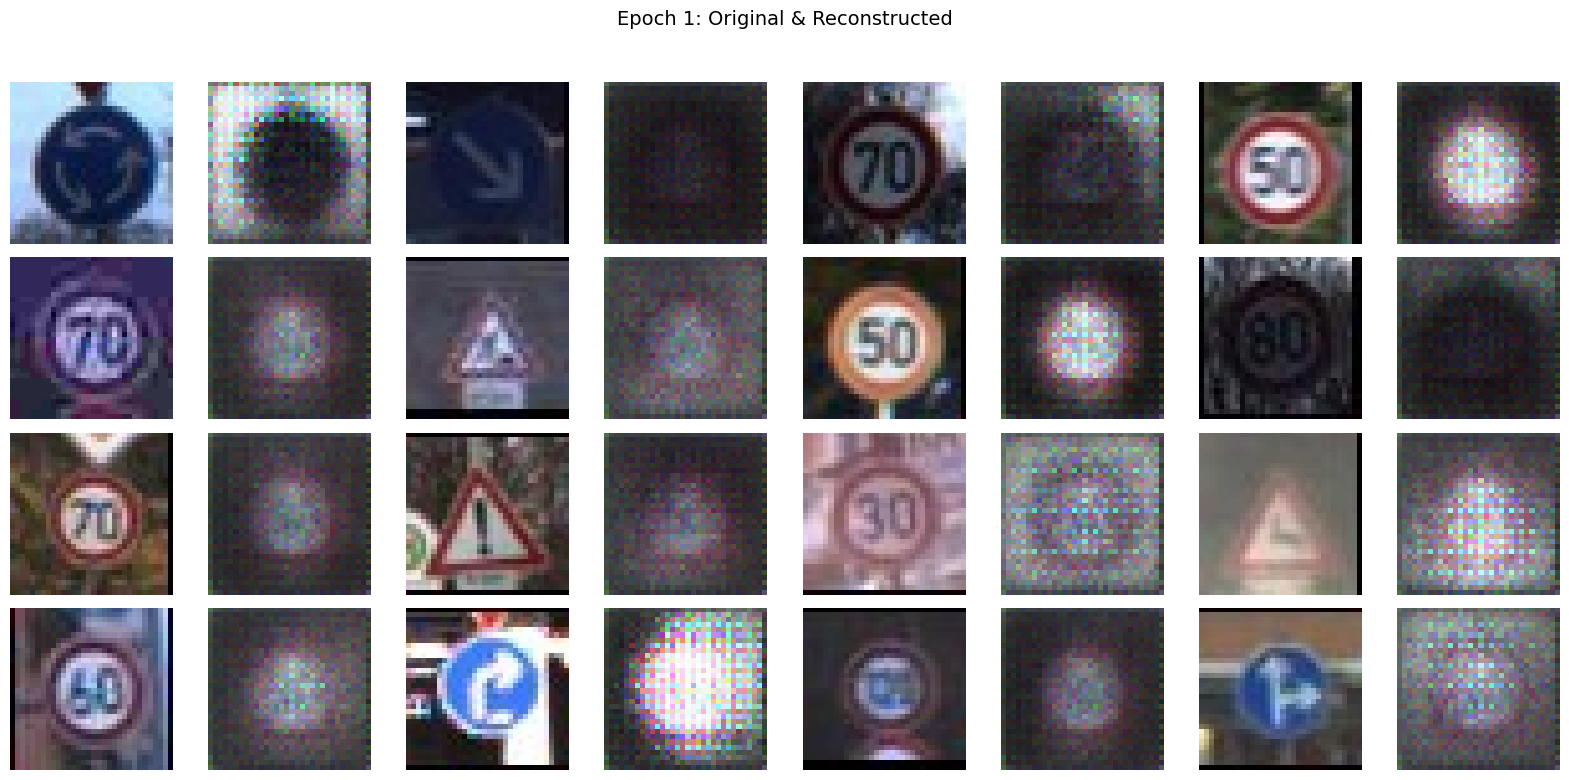

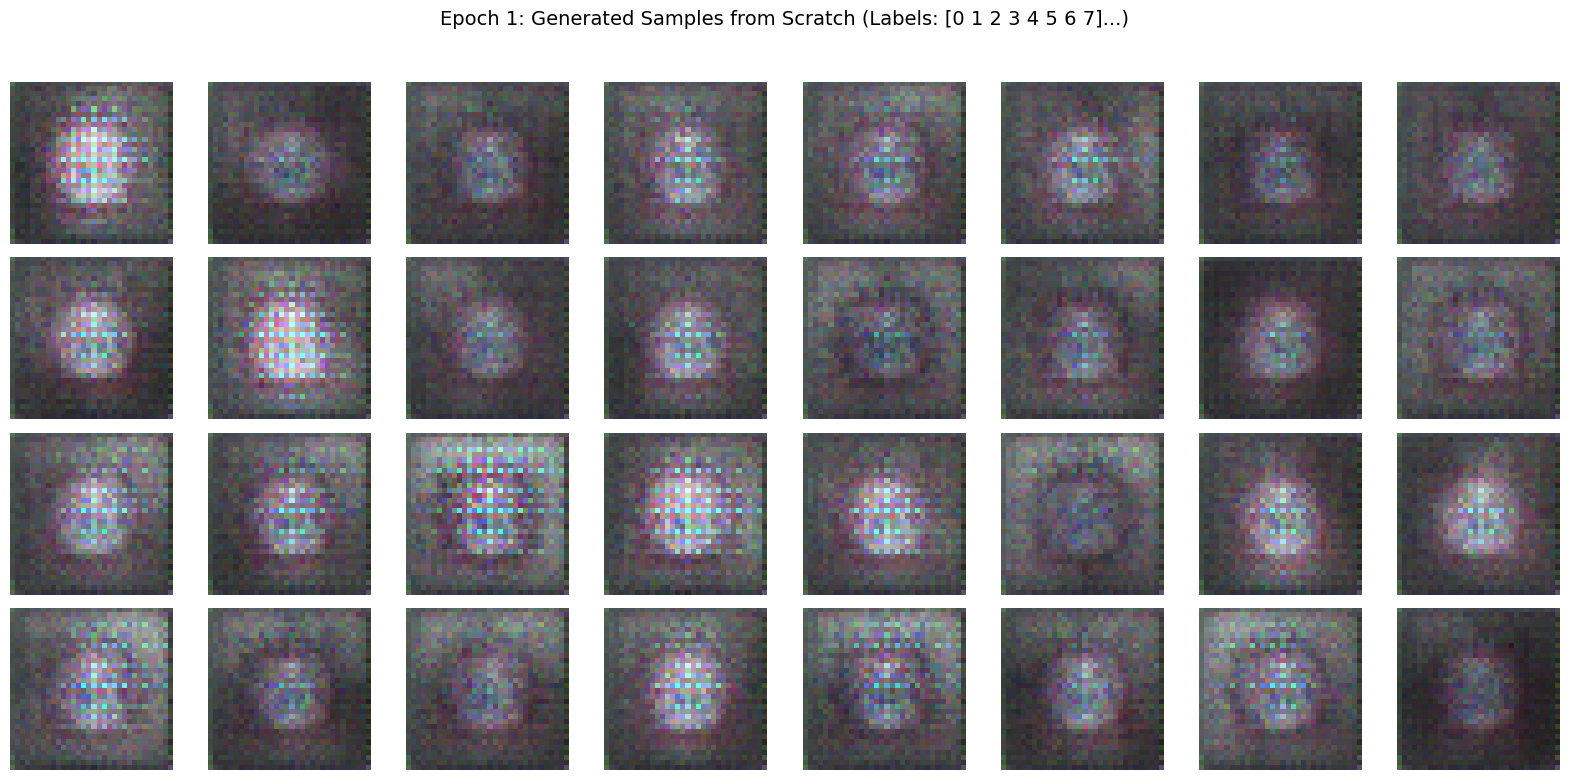

Epoch 2/200: 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


Epoch 2/200: Total Loss: 868.5886, Recon Loss: 823.9231, KLD Loss: 44.6655


Epoch 3/200: 100%|██████████| 62/62 [00:25<00:00,  2.46it/s]


Epoch 3/200: Total Loss: 785.7926, Recon Loss: 732.6074, KLD Loss: 53.1852


Epoch 4/200: 100%|██████████| 62/62 [00:28<00:00,  2.21it/s]


Epoch 4/200: Total Loss: 720.5592, Recon Loss: 660.0493, KLD Loss: 60.5100


Epoch 5/200: 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


Epoch 5/200: Total Loss: 676.0580, Recon Loss: 611.2477, KLD Loss: 64.8104


Epoch 6/200: 100%|██████████| 62/62 [00:27<00:00,  2.24it/s]


Epoch 6/200: Total Loss: 642.3955, Recon Loss: 574.7710, KLD Loss: 67.6245


Epoch 7/200: 100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch 7/200: Total Loss: 617.7057, Recon Loss: 547.8678, KLD Loss: 69.8379


Epoch 8/200: 100%|██████████| 62/62 [00:24<00:00,  2.48it/s]


Epoch 8/200: Total Loss: 597.1158, Recon Loss: 526.2550, KLD Loss: 70.8609


Epoch 9/200: 100%|██████████| 62/62 [00:27<00:00,  2.26it/s]


Epoch 9/200: Total Loss: 581.2286, Recon Loss: 509.6293, KLD Loss: 71.5993


Epoch 10/200: 100%|██████████| 62/62 [00:27<00:00,  2.22it/s]


Epoch 10/200: Total Loss: 567.7499, Recon Loss: 495.6679, KLD Loss: 72.0819


Epoch 11/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 11/200: Total Loss: 556.8047, Recon Loss: 484.5667, KLD Loss: 72.2381


Epoch 12/200: 100%|██████████| 62/62 [00:24<00:00,  2.54it/s]


Epoch 12/200: Total Loss: 548.5813, Recon Loss: 475.7060, KLD Loss: 72.8753


Epoch 13/200: 100%|██████████| 62/62 [00:26<00:00,  2.31it/s]


Epoch 13/200: Total Loss: 539.4361, Recon Loss: 466.4950, KLD Loss: 72.9411


Epoch 14/200: 100%|██████████| 62/62 [00:26<00:00,  2.32it/s]


Epoch 14/200: Total Loss: 532.8745, Recon Loss: 459.7735, KLD Loss: 73.1010


Epoch 15/200: 100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch 15/200: Total Loss: 526.1508, Recon Loss: 452.8085, KLD Loss: 73.3423


Epoch 16/200: 100%|██████████| 62/62 [00:24<00:00,  2.50it/s]


Epoch 16/200: Total Loss: 519.7518, Recon Loss: 446.1783, KLD Loss: 73.5735


Epoch 17/200: 100%|██████████| 62/62 [00:27<00:00,  2.25it/s]


Epoch 17/200: Total Loss: 515.7324, Recon Loss: 442.2337, KLD Loss: 73.4987


Epoch 18/200: 100%|██████████| 62/62 [00:27<00:00,  2.25it/s]


Epoch 18/200: Total Loss: 510.0151, Recon Loss: 436.3424, KLD Loss: 73.6727


Epoch 19/200: 100%|██████████| 62/62 [00:26<00:00,  2.32it/s]


Epoch 19/200: Total Loss: 507.4207, Recon Loss: 433.5161, KLD Loss: 73.9046


Epoch 20/200: 100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch 20/200: Total Loss: 503.0447, Recon Loss: 429.2970, KLD Loss: 73.7477


Epoch 21/200: 100%|██████████| 62/62 [00:24<00:00,  2.54it/s]


Epoch 21/200: Total Loss: 499.2488, Recon Loss: 425.3401, KLD Loss: 73.9086


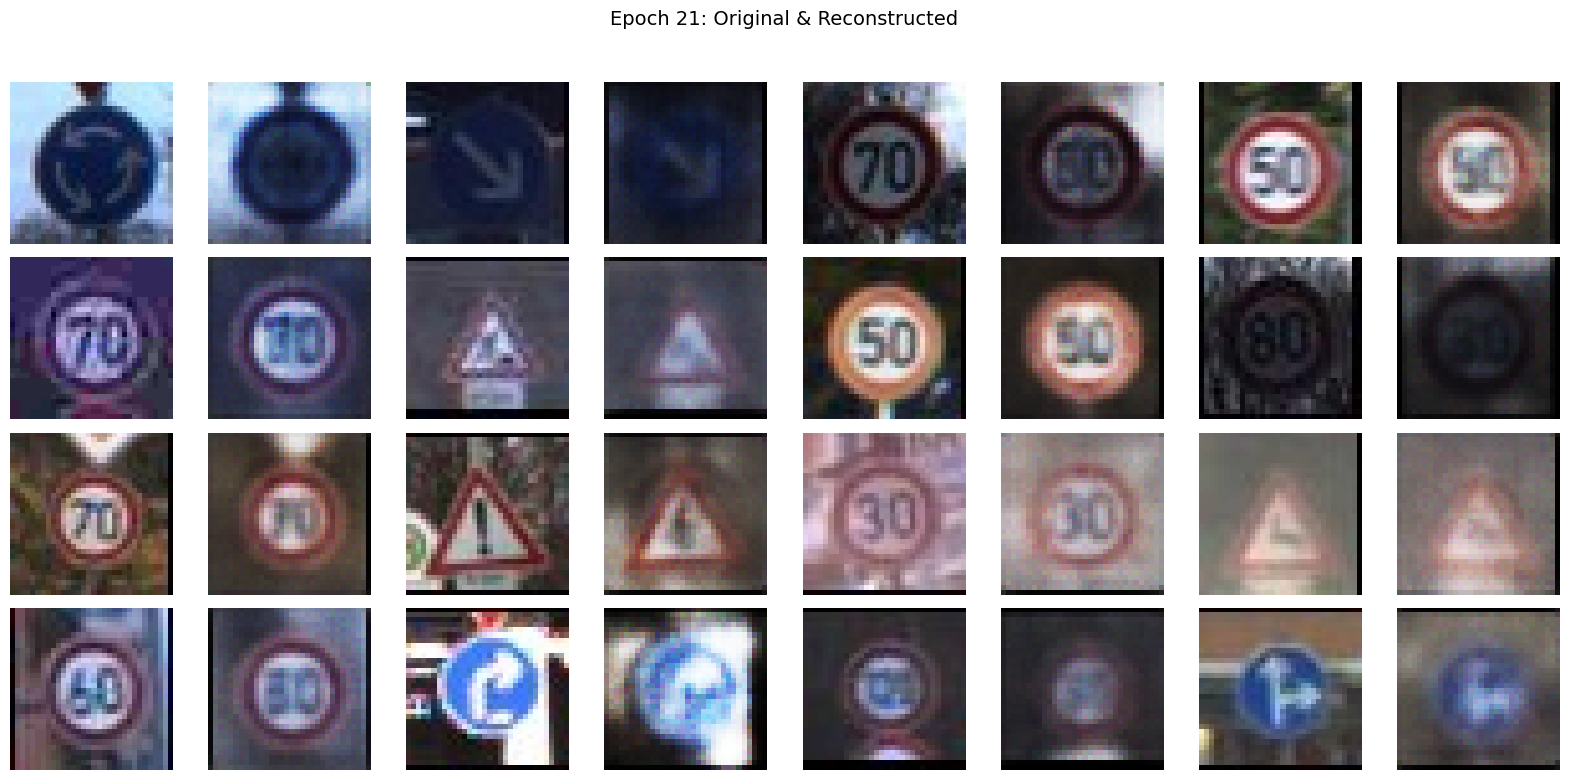

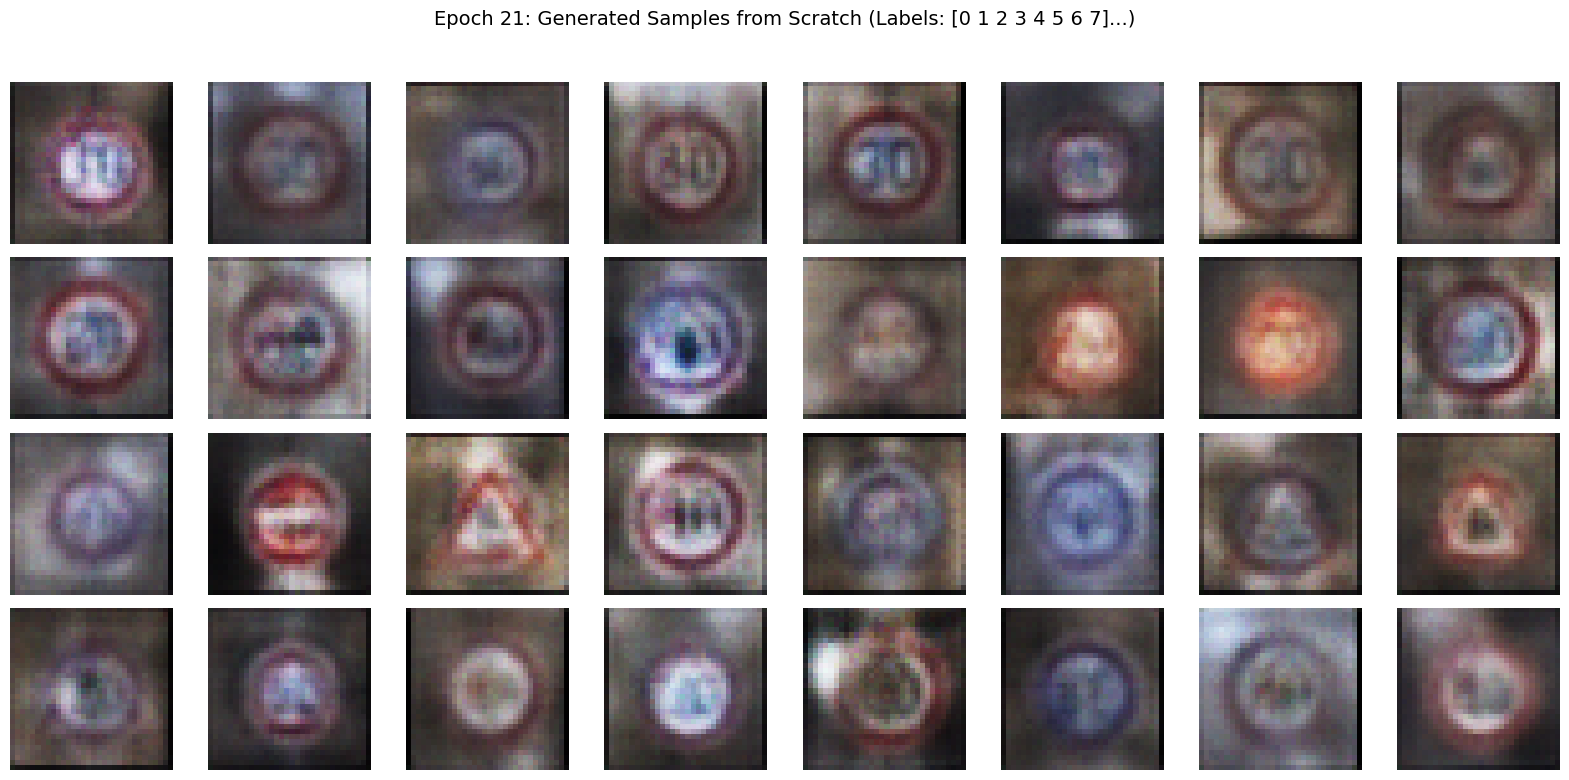

Epoch 22/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 22/200: Total Loss: 495.3133, Recon Loss: 421.4168, KLD Loss: 73.8965


Epoch 23/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 23/200: Total Loss: 492.8000, Recon Loss: 418.7016, KLD Loss: 74.0983


Epoch 24/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 24/200: Total Loss: 489.2495, Recon Loss: 415.0433, KLD Loss: 74.2062


Epoch 25/200: 100%|██████████| 62/62 [00:23<00:00,  2.61it/s]


Epoch 25/200: Total Loss: 487.0184, Recon Loss: 412.7689, KLD Loss: 74.2495


Epoch 26/200: 100%|██████████| 62/62 [00:26<00:00,  2.31it/s]


Epoch 26/200: Total Loss: 484.0417, Recon Loss: 409.7964, KLD Loss: 74.2453


Epoch 27/200: 100%|██████████| 62/62 [00:26<00:00,  2.32it/s]


Epoch 27/200: Total Loss: 481.4019, Recon Loss: 407.0733, KLD Loss: 74.3286


Epoch 28/200: 100%|██████████| 62/62 [00:29<00:00,  2.14it/s]


Epoch 28/200: Total Loss: 479.6164, Recon Loss: 405.3080, KLD Loss: 74.3084


Epoch 29/200: 100%|██████████| 62/62 [00:24<00:00,  2.56it/s]


Epoch 29/200: Total Loss: 479.1839, Recon Loss: 404.9302, KLD Loss: 74.2537


Epoch 30/200: 100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch 30/200: Total Loss: 475.2260, Recon Loss: 400.9469, KLD Loss: 74.2791


Epoch 31/200: 100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch 31/200: Total Loss: 473.5524, Recon Loss: 399.0785, KLD Loss: 74.4740


Epoch 32/200: 100%|██████████| 62/62 [00:26<00:00,  2.32it/s]


Epoch 32/200: Total Loss: 472.3820, Recon Loss: 398.0301, KLD Loss: 74.3519


Epoch 33/200: 100%|██████████| 62/62 [00:23<00:00,  2.59it/s]


Epoch 33/200: Total Loss: 470.2206, Recon Loss: 395.8016, KLD Loss: 74.4190


Epoch 34/200: 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


Epoch 34/200: Total Loss: 467.7669, Recon Loss: 393.1380, KLD Loss: 74.6288


Epoch 35/200: 100%|██████████| 62/62 [00:25<00:00,  2.41it/s]


Epoch 35/200: Total Loss: 466.9170, Recon Loss: 392.3831, KLD Loss: 74.5339


Epoch 36/200: 100%|██████████| 62/62 [00:27<00:00,  2.26it/s]


Epoch 36/200: Total Loss: 465.0274, Recon Loss: 390.4240, KLD Loss: 74.6035


Epoch 37/200: 100%|██████████| 62/62 [00:24<00:00,  2.53it/s]


Epoch 37/200: Total Loss: 464.0990, Recon Loss: 389.3929, KLD Loss: 74.7061


Epoch 38/200: 100%|██████████| 62/62 [00:25<00:00,  2.44it/s]


Epoch 38/200: Total Loss: 461.7708, Recon Loss: 387.1232, KLD Loss: 74.6476


Epoch 39/200: 100%|██████████| 62/62 [00:27<00:00,  2.26it/s]


Epoch 39/200: Total Loss: 461.1782, Recon Loss: 386.4598, KLD Loss: 74.7184


Epoch 40/200: 100%|██████████| 62/62 [00:27<00:00,  2.29it/s]


Epoch 40/200: Total Loss: 459.6118, Recon Loss: 384.8291, KLD Loss: 74.7827


Epoch 41/200: 100%|██████████| 62/62 [00:25<00:00,  2.46it/s]


Epoch 41/200: Total Loss: 457.7613, Recon Loss: 382.7887, KLD Loss: 74.9726


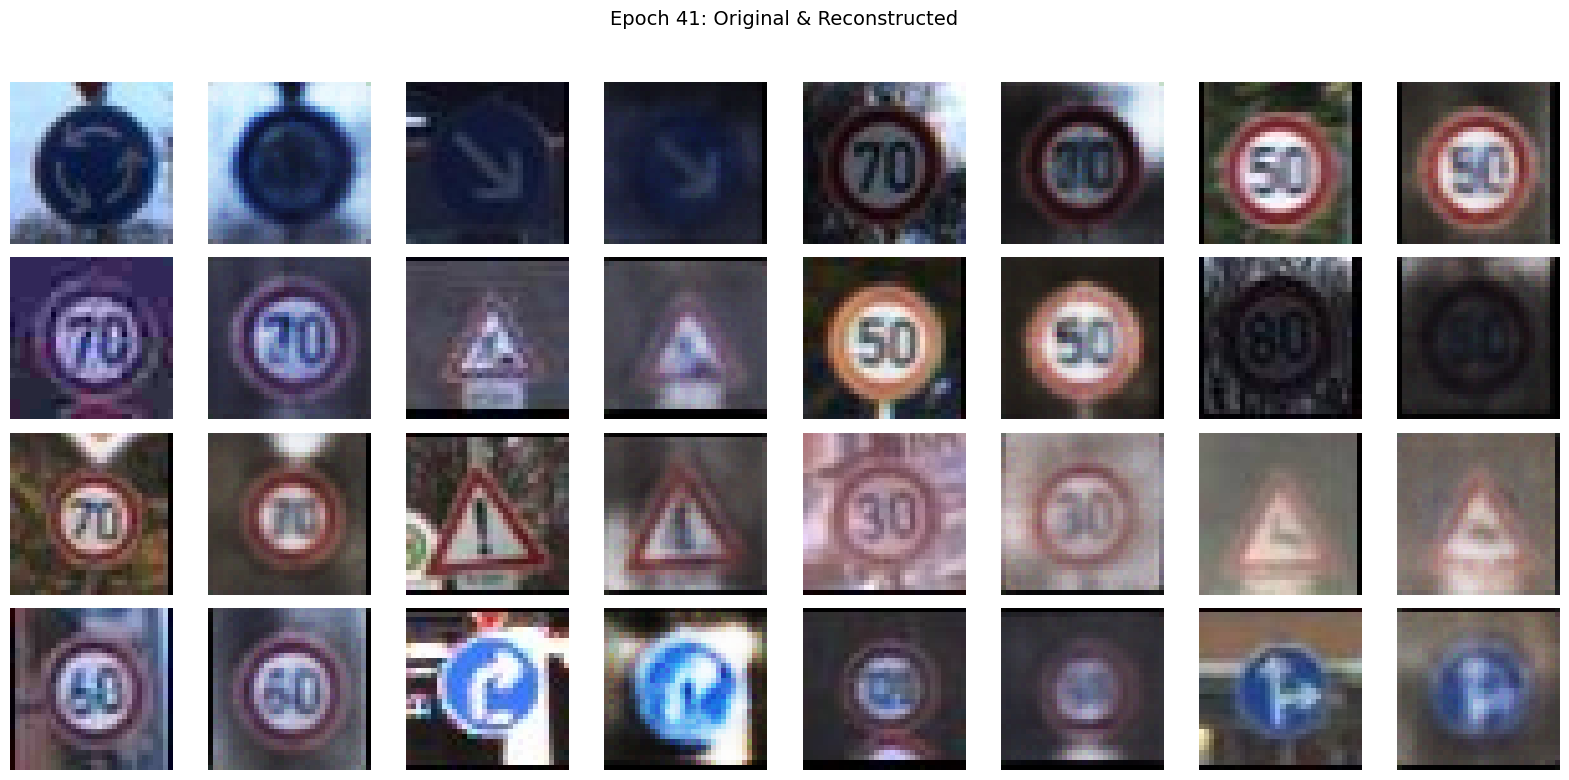

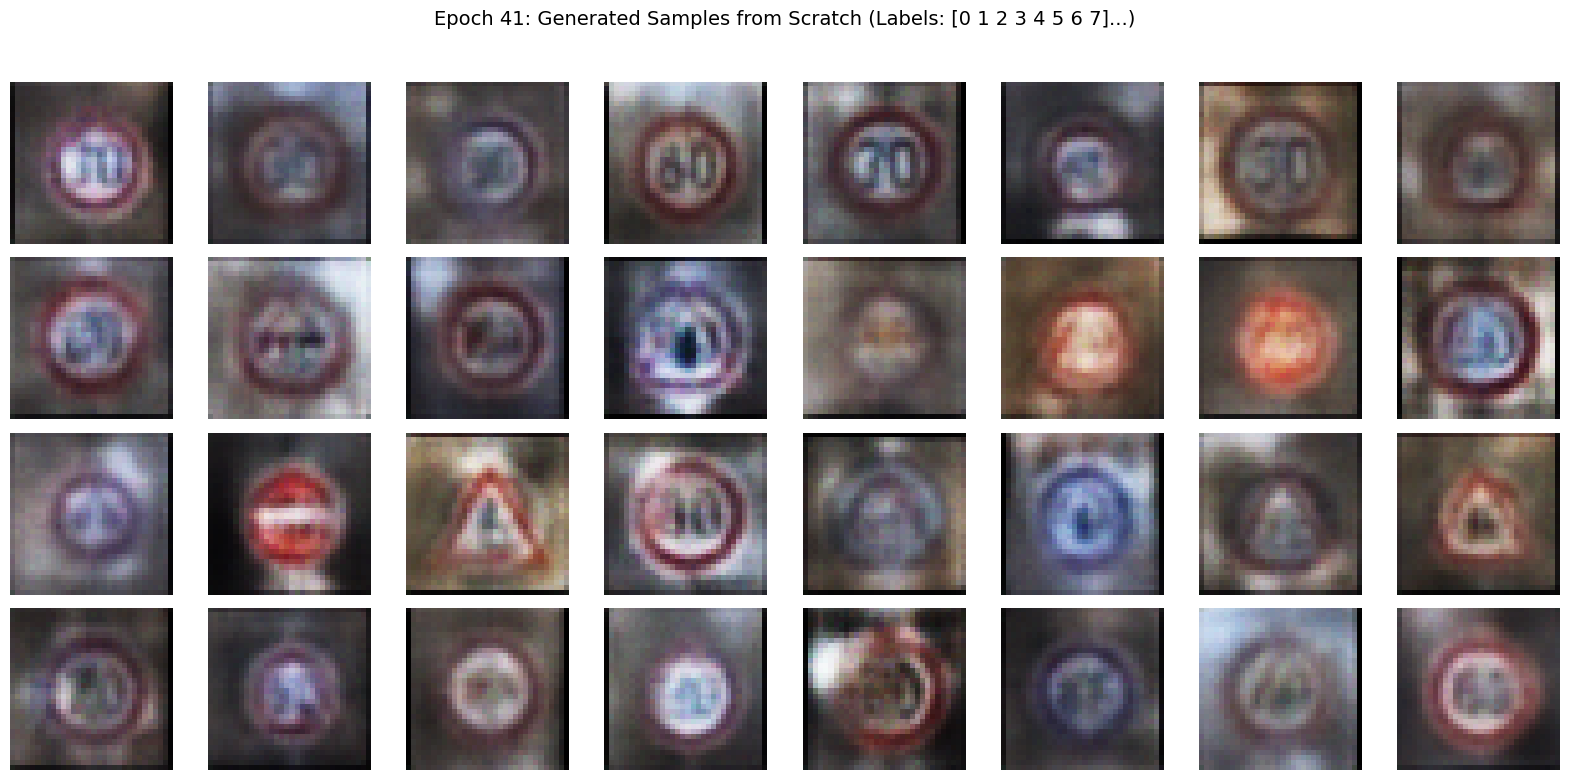

Epoch 42/200: 100%|██████████| 62/62 [00:26<00:00,  2.34it/s]


Epoch 42/200: Total Loss: 456.9739, Recon Loss: 382.2019, KLD Loss: 74.7721


Epoch 43/200: 100%|██████████| 62/62 [00:27<00:00,  2.30it/s]


Epoch 43/200: Total Loss: 456.2781, Recon Loss: 381.5642, KLD Loss: 74.7139


Epoch 44/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 44/200: Total Loss: 455.2373, Recon Loss: 380.4217, KLD Loss: 74.8156


Epoch 45/200: 100%|██████████| 62/62 [00:23<00:00,  2.59it/s]


Epoch 45/200: Total Loss: 454.1865, Recon Loss: 379.3535, KLD Loss: 74.8330


Epoch 46/200: 100%|██████████| 62/62 [00:26<00:00,  2.31it/s]


Epoch 46/200: Total Loss: 452.3466, Recon Loss: 377.4667, KLD Loss: 74.8799


Epoch 47/200: 100%|██████████| 62/62 [00:27<00:00,  2.24it/s]


Epoch 47/200: Total Loss: 452.2192, Recon Loss: 377.3018, KLD Loss: 74.9173


Epoch 48/200: 100%|██████████| 62/62 [00:28<00:00,  2.20it/s]


Epoch 48/200: Total Loss: 450.5727, Recon Loss: 375.5822, KLD Loss: 74.9905


Epoch 49/200: 100%|██████████| 62/62 [00:26<00:00,  2.34it/s]


Epoch 49/200: Total Loss: 450.8455, Recon Loss: 375.9625, KLD Loss: 74.8831


Epoch 50/200: 100%|██████████| 62/62 [00:28<00:00,  2.20it/s]


Epoch 50/200: Total Loss: 449.6269, Recon Loss: 374.6082, KLD Loss: 75.0187


Epoch 51/200: 100%|██████████| 62/62 [00:26<00:00,  2.31it/s]


Epoch 51/200: Total Loss: 447.9487, Recon Loss: 372.9685, KLD Loss: 74.9801


Epoch 52/200: 100%|██████████| 62/62 [00:26<00:00,  2.30it/s]


Epoch 52/200: Total Loss: 447.1136, Recon Loss: 372.1654, KLD Loss: 74.9482


Epoch 53/200: 100%|██████████| 62/62 [00:26<00:00,  2.31it/s]


Epoch 53/200: Total Loss: 446.8971, Recon Loss: 371.7703, KLD Loss: 75.1268


Epoch 54/200: 100%|██████████| 62/62 [00:24<00:00,  2.57it/s]


Epoch 54/200: Total Loss: 445.9570, Recon Loss: 370.8935, KLD Loss: 75.0635


Epoch 55/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 55/200: Total Loss: 445.2756, Recon Loss: 370.2800, KLD Loss: 74.9956


Epoch 56/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 56/200: Total Loss: 444.6039, Recon Loss: 369.4388, KLD Loss: 75.1651


Epoch 57/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 57/200: Total Loss: 444.4854, Recon Loss: 369.3717, KLD Loss: 75.1137


Epoch 58/200: 100%|██████████| 62/62 [00:23<00:00,  2.59it/s]


Epoch 58/200: Total Loss: 443.2079, Recon Loss: 368.0992, KLD Loss: 75.1087


Epoch 59/200: 100%|██████████| 62/62 [00:26<00:00,  2.30it/s]


Epoch 59/200: Total Loss: 442.2696, Recon Loss: 367.1725, KLD Loss: 75.0971


Epoch 60/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 60/200: Total Loss: 441.5402, Recon Loss: 366.3111, KLD Loss: 75.2292


Epoch 61/200: 100%|██████████| 62/62 [00:23<00:00,  2.65it/s]


Epoch 61/200: Total Loss: 441.1591, Recon Loss: 365.9827, KLD Loss: 75.1764


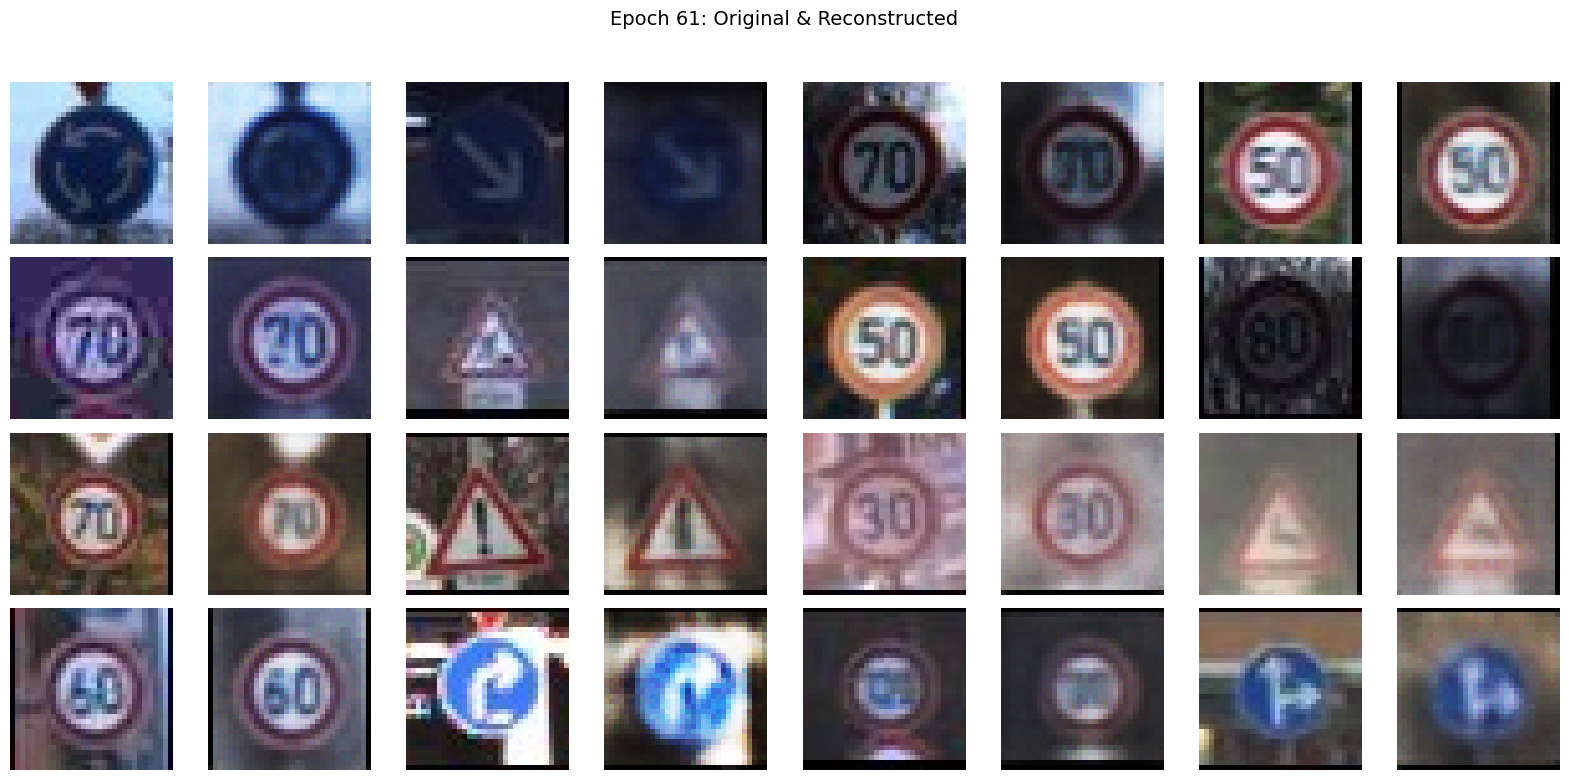

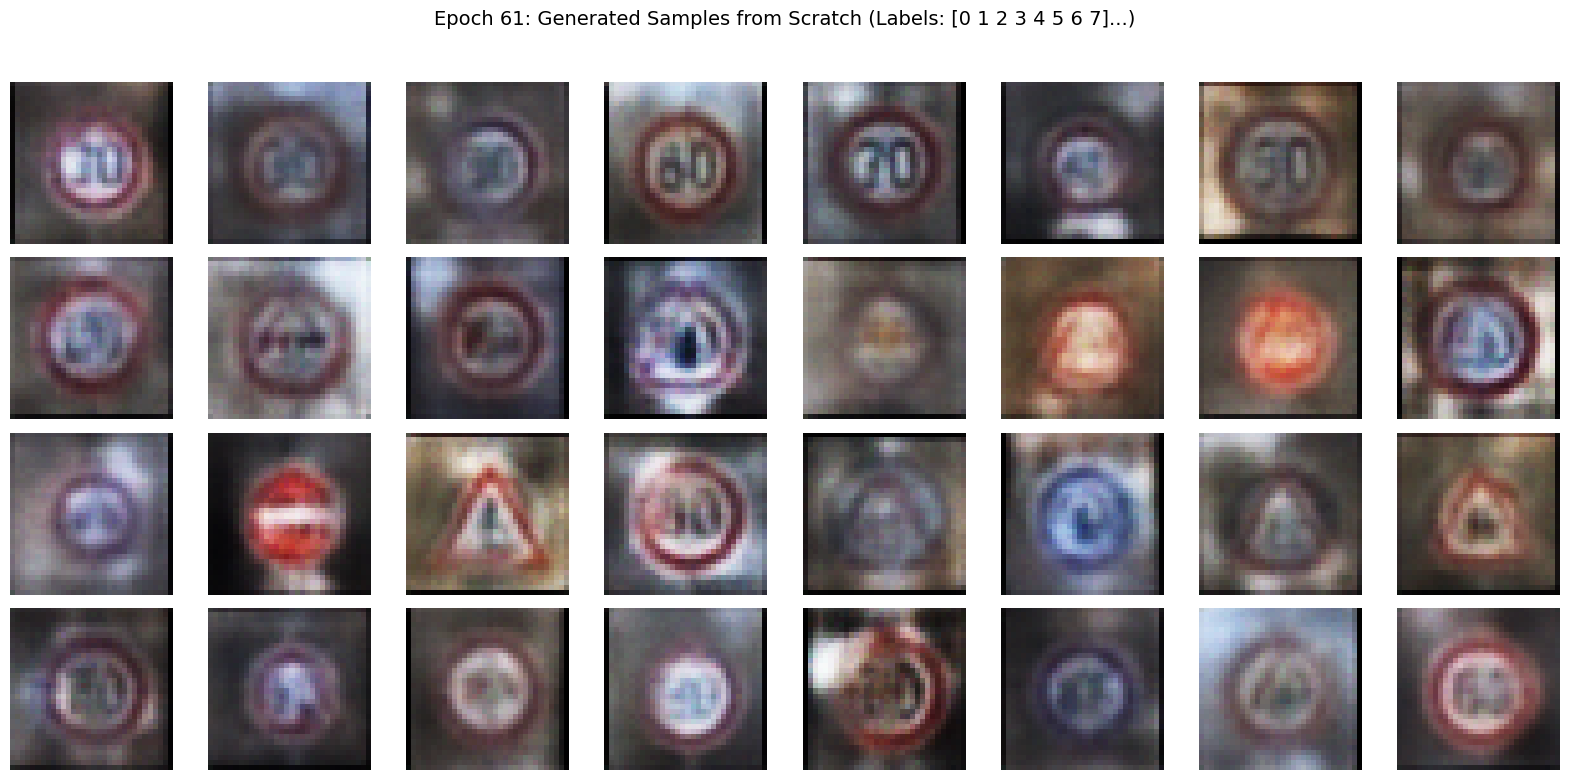

Epoch 62/200: 100%|██████████| 62/62 [00:23<00:00,  2.65it/s]


Epoch 62/200: Total Loss: 440.2908, Recon Loss: 365.1460, KLD Loss: 75.1448


Epoch 63/200: 100%|██████████| 62/62 [00:25<00:00,  2.39it/s]


Epoch 63/200: Total Loss: 440.1140, Recon Loss: 364.9851, KLD Loss: 75.1289


Epoch 64/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 64/200: Total Loss: 439.3805, Recon Loss: 364.2590, KLD Loss: 75.1216


Epoch 65/200: 100%|██████████| 62/62 [00:23<00:00,  2.65it/s]


Epoch 65/200: Total Loss: 439.0319, Recon Loss: 363.8546, KLD Loss: 75.1773


Epoch 66/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 66/200: Total Loss: 439.1058, Recon Loss: 363.8597, KLD Loss: 75.2461


Epoch 67/200: 100%|██████████| 62/62 [00:25<00:00,  2.40it/s]


Epoch 67/200: Total Loss: 438.5855, Recon Loss: 363.4608, KLD Loss: 75.1247


Epoch 68/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 68/200: Total Loss: 437.4632, Recon Loss: 362.2550, KLD Loss: 75.2082


Epoch 69/200: 100%|██████████| 62/62 [00:23<00:00,  2.64it/s]


Epoch 69/200: Total Loss: 437.2284, Recon Loss: 362.0165, KLD Loss: 75.2119


Epoch 70/200: 100%|██████████| 62/62 [00:25<00:00,  2.40it/s]


Epoch 70/200: Total Loss: 436.4976, Recon Loss: 361.2271, KLD Loss: 75.2705


Epoch 71/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 71/200: Total Loss: 436.1471, Recon Loss: 360.9445, KLD Loss: 75.2025


Epoch 72/200: 100%|██████████| 62/62 [00:23<00:00,  2.65it/s]


Epoch 72/200: Total Loss: 435.4264, Recon Loss: 360.1548, KLD Loss: 75.2716


Epoch 73/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 73/200: Total Loss: 434.9166, Recon Loss: 359.6506, KLD Loss: 75.2659


Epoch 74/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 74/200: Total Loss: 434.0536, Recon Loss: 358.7877, KLD Loss: 75.2659


Epoch 75/200: 100%|██████████| 62/62 [00:25<00:00,  2.39it/s]


Epoch 75/200: Total Loss: 434.1979, Recon Loss: 358.9214, KLD Loss: 75.2765


Epoch 76/200: 100%|██████████| 62/62 [00:23<00:00,  2.68it/s]


Epoch 76/200: Total Loss: 434.8813, Recon Loss: 359.6776, KLD Loss: 75.2038


Epoch 77/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 77/200: Total Loss: 433.9237, Recon Loss: 358.5423, KLD Loss: 75.3814


Epoch 78/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 78/200: Total Loss: 432.2009, Recon Loss: 356.8920, KLD Loss: 75.3089


Epoch 79/200: 100%|██████████| 62/62 [00:22<00:00,  2.70it/s]


Epoch 79/200: Total Loss: 432.2593, Recon Loss: 356.9664, KLD Loss: 75.2929


Epoch 80/200: 100%|██████████| 62/62 [00:25<00:00,  2.40it/s]


Epoch 80/200: Total Loss: 432.1413, Recon Loss: 356.8258, KLD Loss: 75.3155


Epoch 81/200: 100%|██████████| 62/62 [00:27<00:00,  2.29it/s]


Epoch 81/200: Total Loss: 433.5001, Recon Loss: 358.0819, KLD Loss: 75.4181


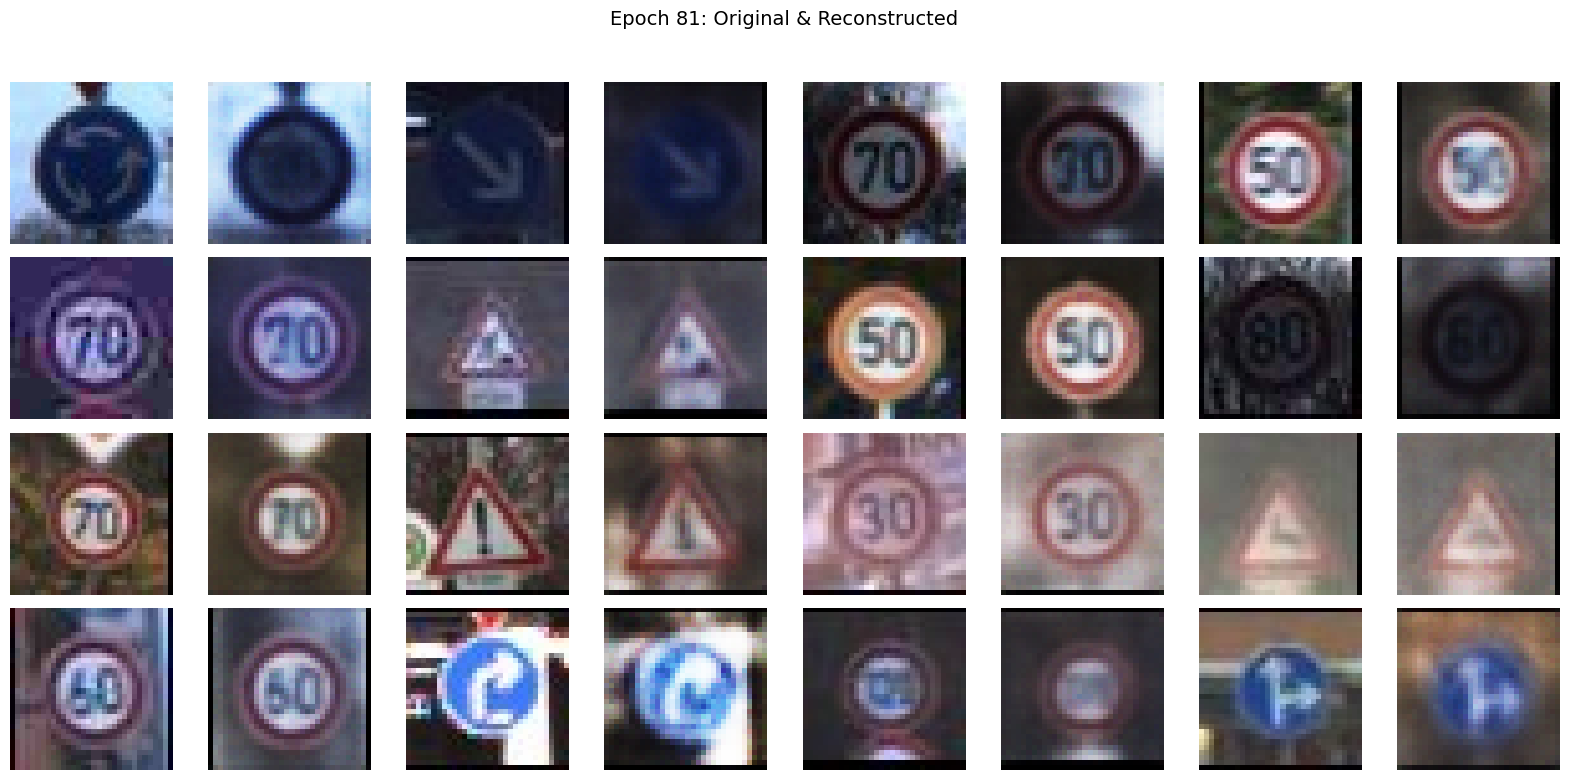

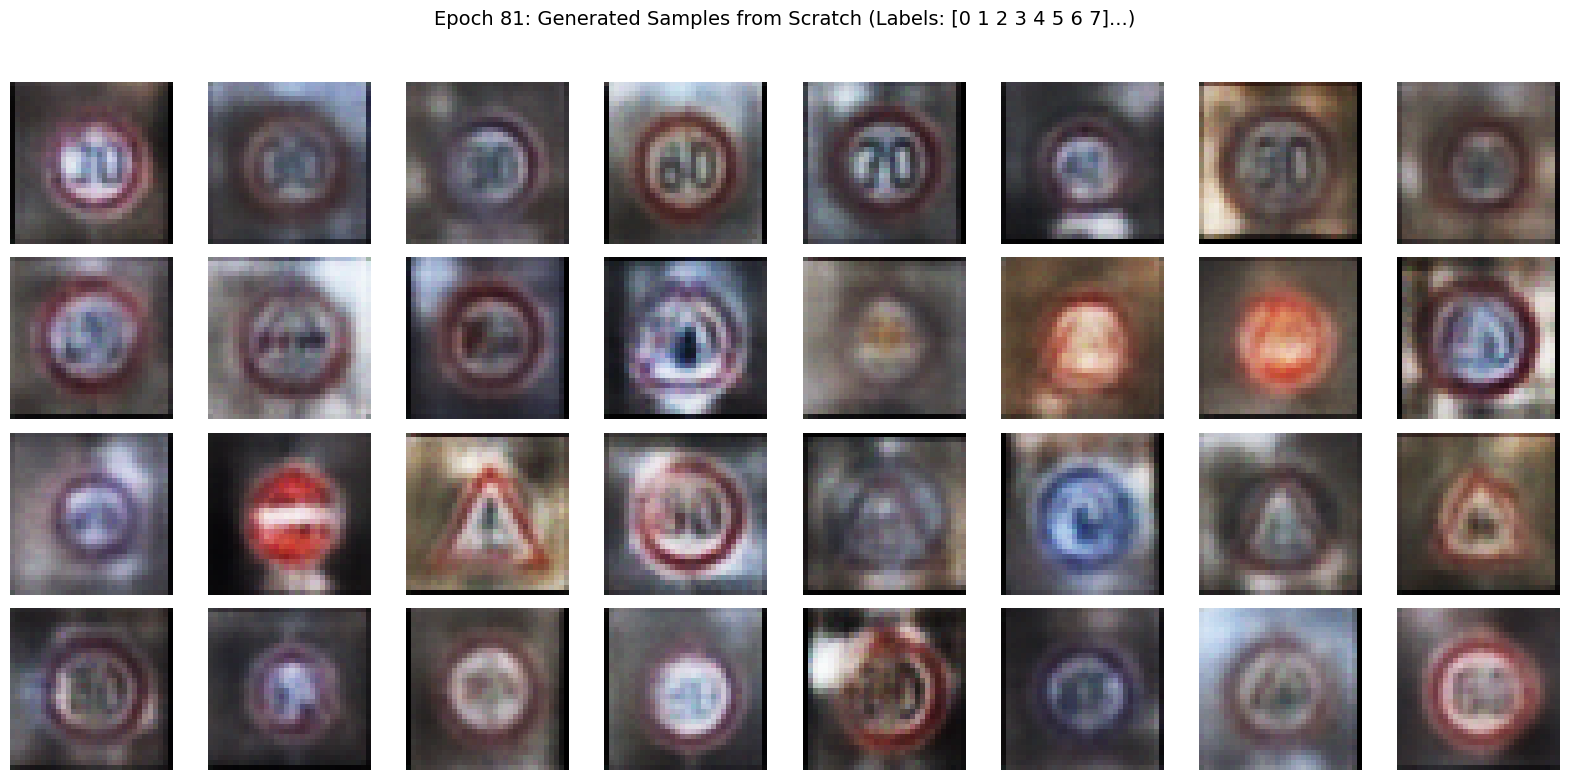

Epoch 82/200: 100%|██████████| 62/62 [00:25<00:00,  2.44it/s]


Epoch 82/200: Total Loss: 431.9073, Recon Loss: 356.5565, KLD Loss: 75.3508


Epoch 83/200: 100%|██████████| 62/62 [00:22<00:00,  2.71it/s]


Epoch 83/200: Total Loss: 431.7664, Recon Loss: 356.4724, KLD Loss: 75.2941


Epoch 84/200: 100%|██████████| 62/62 [00:27<00:00,  2.24it/s]


Epoch 84/200: Total Loss: 430.6244, Recon Loss: 355.2269, KLD Loss: 75.3975


Epoch 85/200: 100%|██████████| 62/62 [00:25<00:00,  2.48it/s]


Epoch 85/200: Total Loss: 430.7327, Recon Loss: 355.4210, KLD Loss: 75.3117


Epoch 86/200: 100%|██████████| 62/62 [00:26<00:00,  2.31it/s]


Epoch 86/200: Total Loss: 429.8502, Recon Loss: 354.4488, KLD Loss: 75.4014


Epoch 87/200: 100%|██████████| 62/62 [00:23<00:00,  2.64it/s]


Epoch 87/200: Total Loss: 430.5080, Recon Loss: 355.0982, KLD Loss: 75.4098


Epoch 88/200: 100%|██████████| 62/62 [00:25<00:00,  2.46it/s]


Epoch 88/200: Total Loss: 430.3970, Recon Loss: 355.0931, KLD Loss: 75.3039


Epoch 89/200: 100%|██████████| 62/62 [00:26<00:00,  2.32it/s]


Epoch 89/200: Total Loss: 429.1945, Recon Loss: 353.8271, KLD Loss: 75.3674


Epoch 90/200: 100%|██████████| 62/62 [00:22<00:00,  2.72it/s]


Epoch 90/200: Total Loss: 429.5042, Recon Loss: 354.1736, KLD Loss: 75.3307


Epoch 91/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 91/200: Total Loss: 428.9510, Recon Loss: 353.5876, KLD Loss: 75.3634


Epoch 92/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 92/200: Total Loss: 427.7217, Recon Loss: 352.3116, KLD Loss: 75.4100


Epoch 93/200: 100%|██████████| 62/62 [00:25<00:00,  2.39it/s]


Epoch 93/200: Total Loss: 428.8903, Recon Loss: 353.4798, KLD Loss: 75.4105


Epoch 94/200: 100%|██████████| 62/62 [00:23<00:00,  2.68it/s]


Epoch 94/200: Total Loss: 427.6868, Recon Loss: 352.1947, KLD Loss: 75.4921


Epoch 95/200: 100%|██████████| 62/62 [00:26<00:00,  2.30it/s]


Epoch 95/200: Total Loss: 428.1057, Recon Loss: 352.7278, KLD Loss: 75.3780


Epoch 96/200: 100%|██████████| 62/62 [00:25<00:00,  2.41it/s]


Epoch 96/200: Total Loss: 427.2710, Recon Loss: 351.7916, KLD Loss: 75.4794


Epoch 97/200: 100%|██████████| 62/62 [00:22<00:00,  2.72it/s]


Epoch 97/200: Total Loss: 428.1415, Recon Loss: 352.8329, KLD Loss: 75.3085


Epoch 98/200: 100%|██████████| 62/62 [00:26<00:00,  2.30it/s]


Epoch 98/200: Total Loss: 427.3548, Recon Loss: 351.8976, KLD Loss: 75.4572


Epoch 99/200: 100%|██████████| 62/62 [00:25<00:00,  2.43it/s]


Epoch 99/200: Total Loss: 427.4578, Recon Loss: 352.0464, KLD Loss: 75.4115


Epoch 100/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 100/200: Total Loss: 426.9017, Recon Loss: 351.5625, KLD Loss: 75.3392


Epoch 101/200: 100%|██████████| 62/62 [00:22<00:00,  2.71it/s]


Epoch 101/200: Total Loss: 426.5976, Recon Loss: 351.1810, KLD Loss: 75.4166


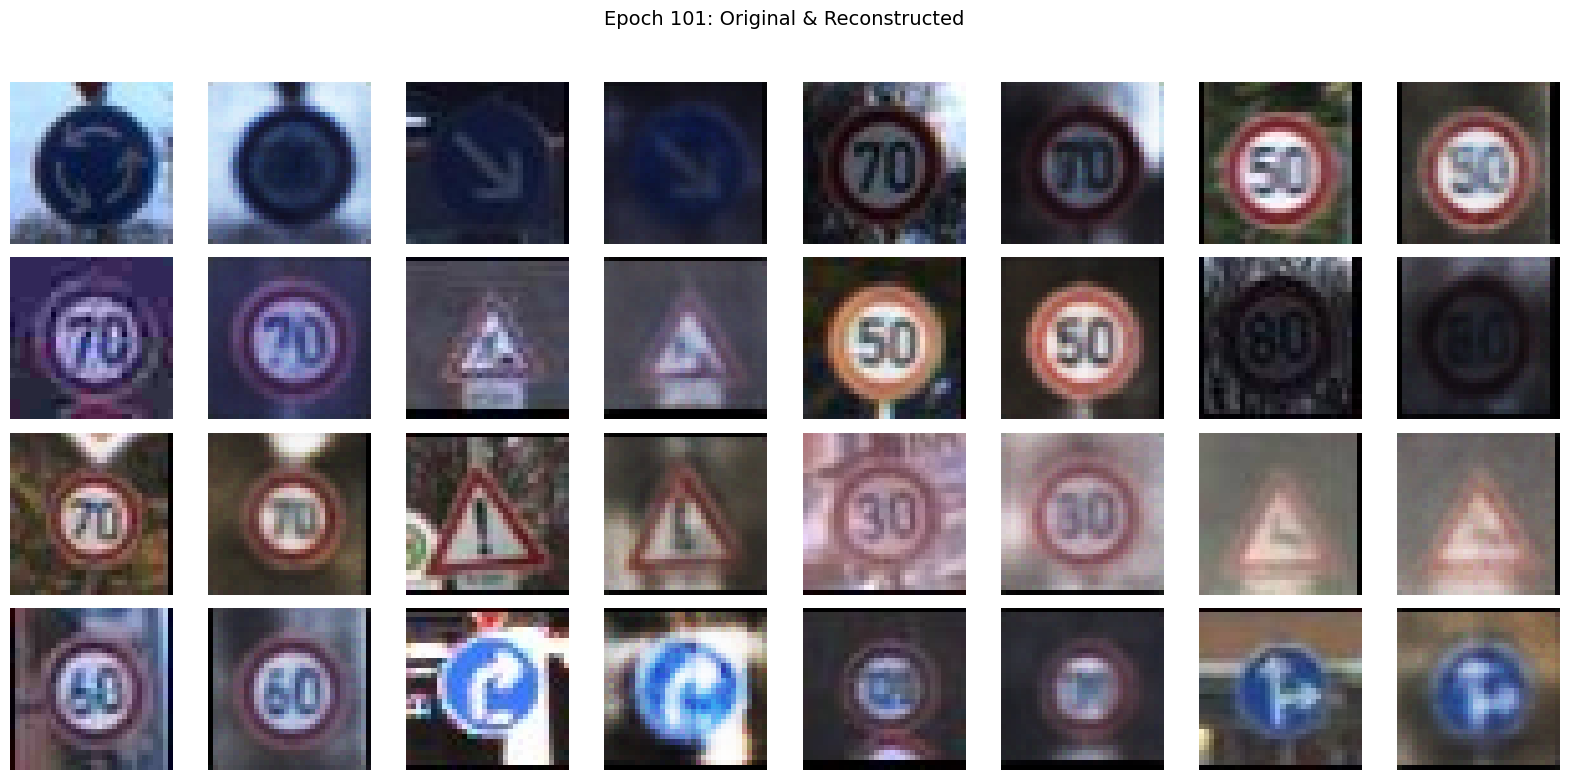

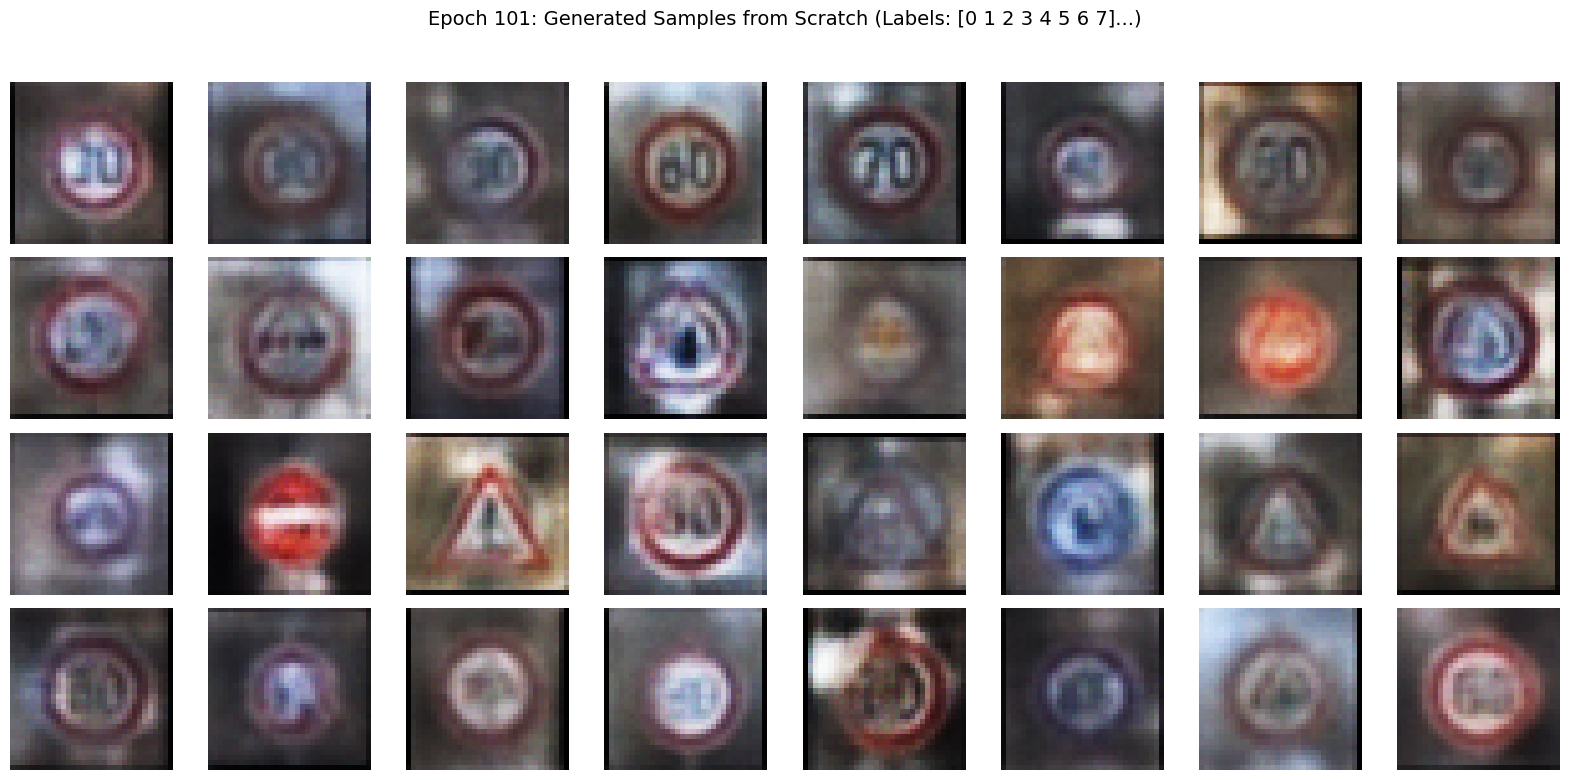

Epoch 102/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 102/200: Total Loss: 426.1315, Recon Loss: 350.7300, KLD Loss: 75.4016


Epoch 103/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 103/200: Total Loss: 426.4791, Recon Loss: 351.0545, KLD Loss: 75.4247


Epoch 104/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 104/200: Total Loss: 425.8459, Recon Loss: 350.3598, KLD Loss: 75.4862


Epoch 105/200: 100%|██████████| 62/62 [00:23<00:00,  2.68it/s]


Epoch 105/200: Total Loss: 425.9593, Recon Loss: 350.5800, KLD Loss: 75.3793


Epoch 106/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 106/200: Total Loss: 425.3952, Recon Loss: 349.9492, KLD Loss: 75.4460


Epoch 107/200: 100%|██████████| 62/62 [00:26<00:00,  2.34it/s]


Epoch 107/200: Total Loss: 424.8998, Recon Loss: 349.4764, KLD Loss: 75.4234


Epoch 108/200: 100%|██████████| 62/62 [00:23<00:00,  2.68it/s]


Epoch 108/200: Total Loss: 425.0849, Recon Loss: 349.5462, KLD Loss: 75.5387


Epoch 109/200: 100%|██████████| 62/62 [00:26<00:00,  2.34it/s]


Epoch 109/200: Total Loss: 425.0861, Recon Loss: 349.6546, KLD Loss: 75.4315


Epoch 110/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 110/200: Total Loss: 425.2941, Recon Loss: 349.8707, KLD Loss: 75.4234


Epoch 111/200: 100%|██████████| 62/62 [00:26<00:00,  2.34it/s]


Epoch 111/200: Total Loss: 424.7806, Recon Loss: 349.2868, KLD Loss: 75.4938


Epoch 112/200: 100%|██████████| 62/62 [00:22<00:00,  2.72it/s]


Epoch 112/200: Total Loss: 423.8030, Recon Loss: 348.2341, KLD Loss: 75.5689


Epoch 113/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 113/200: Total Loss: 423.7202, Recon Loss: 348.2479, KLD Loss: 75.4724


Epoch 114/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 114/200: Total Loss: 424.0528, Recon Loss: 348.5298, KLD Loss: 75.5230


Epoch 115/200: 100%|██████████| 62/62 [00:23<00:00,  2.68it/s]


Epoch 115/200: Total Loss: 423.5762, Recon Loss: 348.0487, KLD Loss: 75.5275


Epoch 116/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 116/200: Total Loss: 423.9282, Recon Loss: 348.4452, KLD Loss: 75.4830


Epoch 117/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 117/200: Total Loss: 423.3538, Recon Loss: 347.7626, KLD Loss: 75.5912


Epoch 118/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 118/200: Total Loss: 423.7350, Recon Loss: 348.2821, KLD Loss: 75.4529


Epoch 119/200: 100%|██████████| 62/62 [00:22<00:00,  2.71it/s]


Epoch 119/200: Total Loss: 423.6672, Recon Loss: 348.2542, KLD Loss: 75.4130


Epoch 120/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 120/200: Total Loss: 423.0516, Recon Loss: 347.5154, KLD Loss: 75.5362


Epoch 121/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 121/200: Total Loss: 423.2467, Recon Loss: 347.8738, KLD Loss: 75.3729


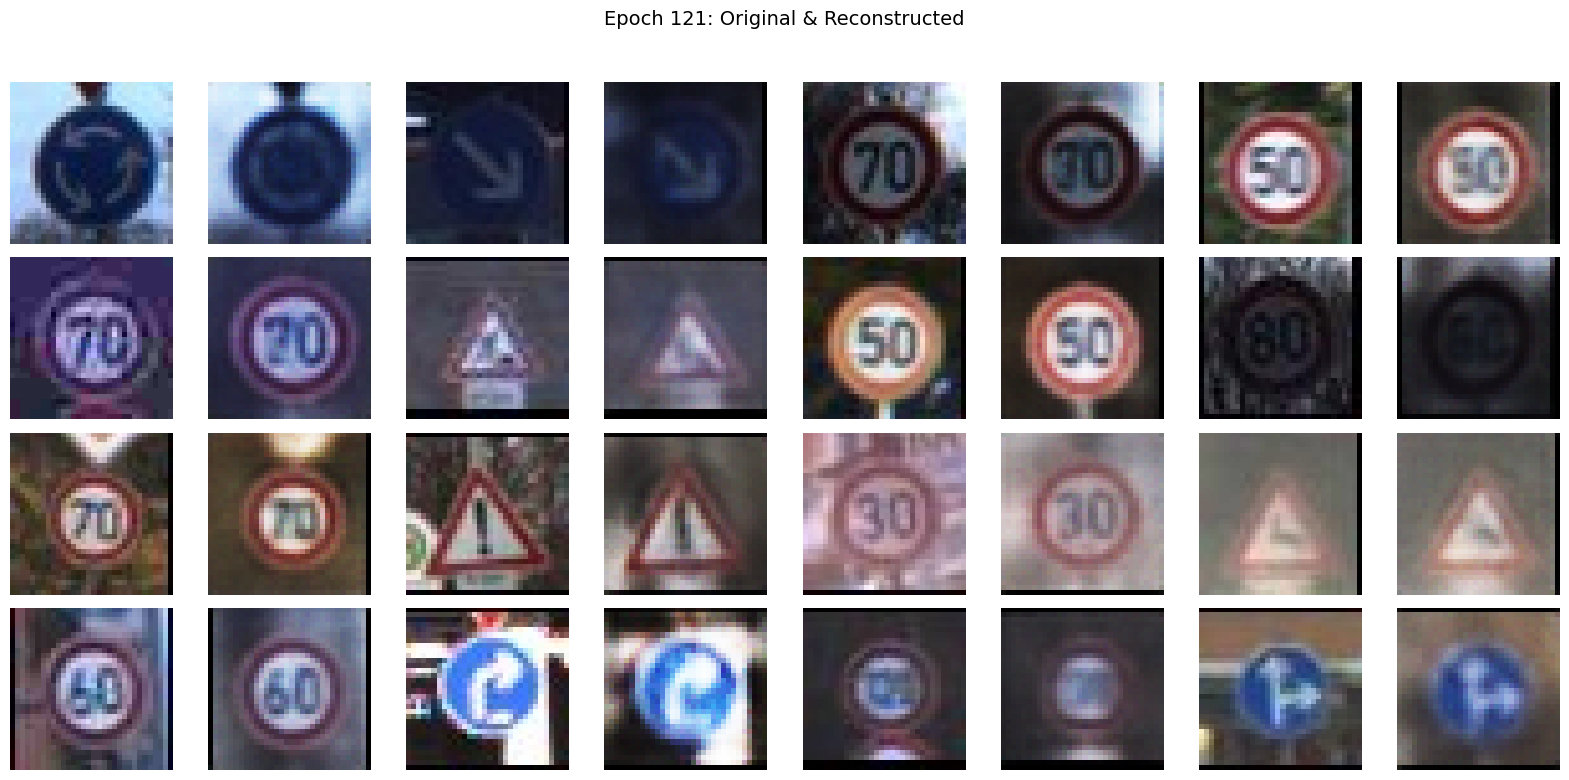

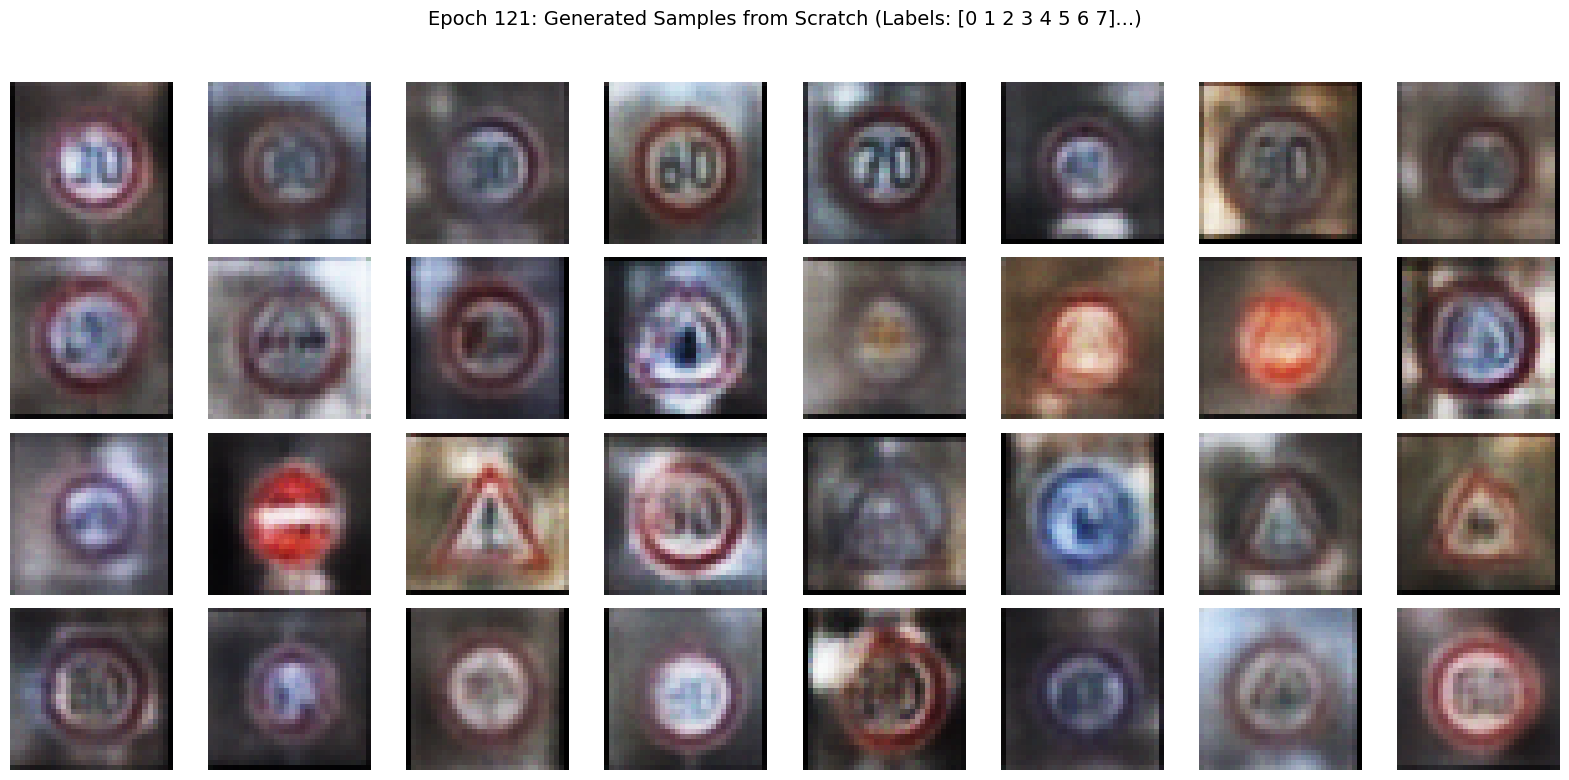

Epoch 122/200: 100%|██████████| 62/62 [00:22<00:00,  2.73it/s]


Epoch 122/200: Total Loss: 422.7566, Recon Loss: 347.2523, KLD Loss: 75.5043


Epoch 123/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 123/200: Total Loss: 423.3811, Recon Loss: 347.9753, KLD Loss: 75.4058


Epoch 124/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 124/200: Total Loss: 422.9371, Recon Loss: 347.4775, KLD Loss: 75.4596


Epoch 125/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 125/200: Total Loss: 422.3193, Recon Loss: 346.8074, KLD Loss: 75.5119


Epoch 126/200: 100%|██████████| 62/62 [00:23<00:00,  2.69it/s]


Epoch 126/200: Total Loss: 422.0896, Recon Loss: 346.5865, KLD Loss: 75.5031


Epoch 127/200: 100%|██████████| 62/62 [00:26<00:00,  2.34it/s]


Epoch 127/200: Total Loss: 421.9415, Recon Loss: 346.3982, KLD Loss: 75.5433


Epoch 128/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 128/200: Total Loss: 422.6313, Recon Loss: 347.1174, KLD Loss: 75.5138


Epoch 129/200: 100%|██████████| 62/62 [00:22<00:00,  2.70it/s]


Epoch 129/200: Total Loss: 421.5262, Recon Loss: 346.0428, KLD Loss: 75.4833


Epoch 130/200: 100%|██████████| 62/62 [00:26<00:00,  2.32it/s]


Epoch 130/200: Total Loss: 421.2973, Recon Loss: 345.7868, KLD Loss: 75.5105


Epoch 131/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 131/200: Total Loss: 421.3899, Recon Loss: 345.8713, KLD Loss: 75.5185


Epoch 132/200: 100%|██████████| 62/62 [00:25<00:00,  2.39it/s]


Epoch 132/200: Total Loss: 421.6518, Recon Loss: 346.1772, KLD Loss: 75.4746


Epoch 133/200: 100%|██████████| 62/62 [00:23<00:00,  2.69it/s]


Epoch 133/200: Total Loss: 420.8783, Recon Loss: 345.3664, KLD Loss: 75.5119


Epoch 134/200: 100%|██████████| 62/62 [00:27<00:00,  2.29it/s]


Epoch 134/200: Total Loss: 421.5786, Recon Loss: 346.0089, KLD Loss: 75.5697


Epoch 135/200: 100%|██████████| 62/62 [00:25<00:00,  2.44it/s]


Epoch 135/200: Total Loss: 421.3048, Recon Loss: 345.7225, KLD Loss: 75.5823


Epoch 136/200: 100%|██████████| 62/62 [00:22<00:00,  2.70it/s]


Epoch 136/200: Total Loss: 421.3488, Recon Loss: 345.8381, KLD Loss: 75.5107


Epoch 137/200: 100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch 137/200: Total Loss: 420.1963, Recon Loss: 344.7333, KLD Loss: 75.4630


Epoch 138/200: 100%|██████████| 62/62 [00:25<00:00,  2.42it/s]


Epoch 138/200: Total Loss: 420.6383, Recon Loss: 345.0518, KLD Loss: 75.5865


Epoch 139/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 139/200: Total Loss: 420.4756, Recon Loss: 344.9691, KLD Loss: 75.5065


Epoch 140/200: 100%|██████████| 62/62 [00:22<00:00,  2.72it/s]


Epoch 140/200: Total Loss: 420.5789, Recon Loss: 345.0729, KLD Loss: 75.5060


Epoch 141/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 141/200: Total Loss: 420.4128, Recon Loss: 344.9013, KLD Loss: 75.5115


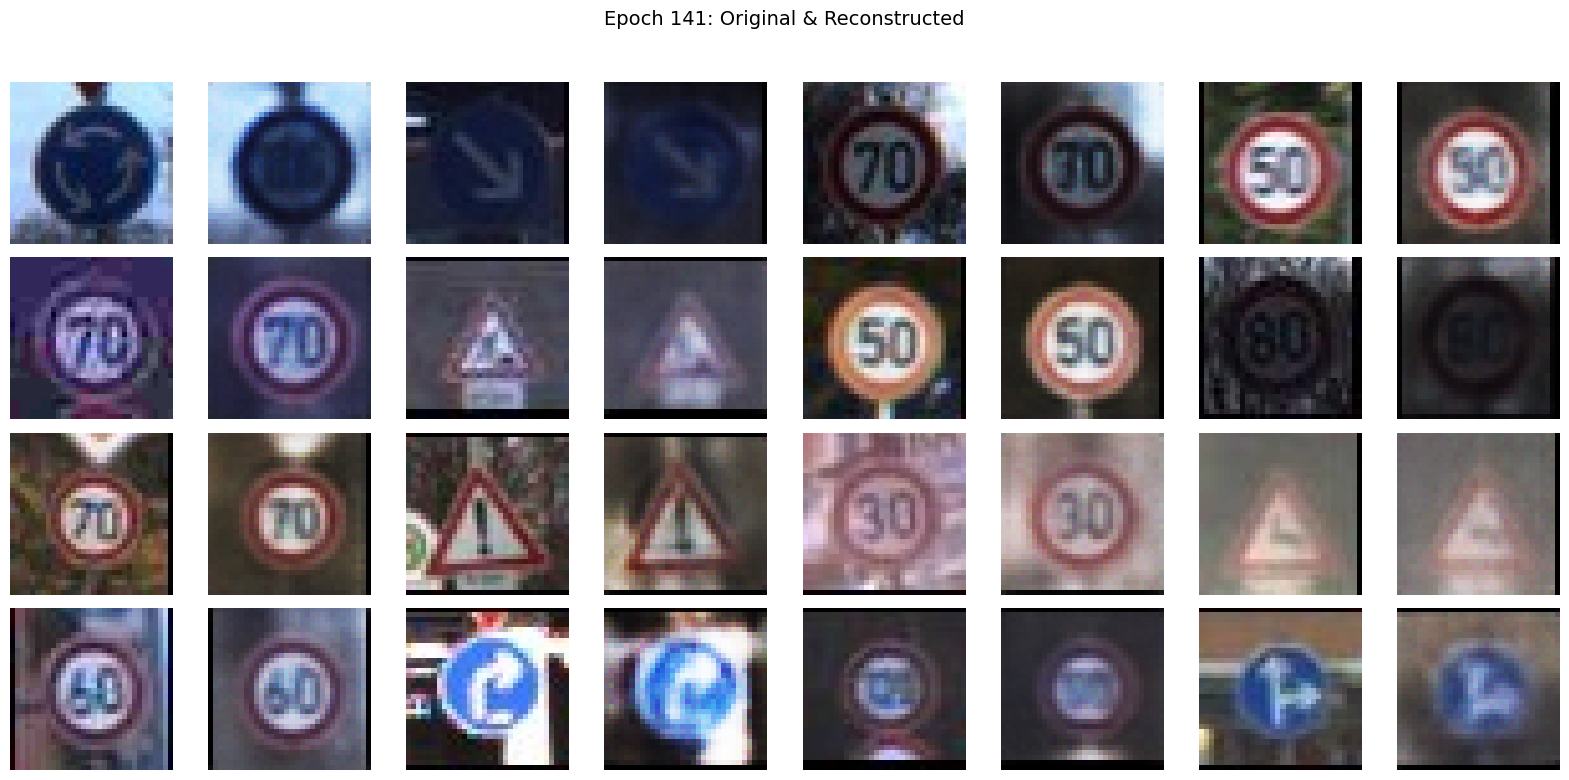

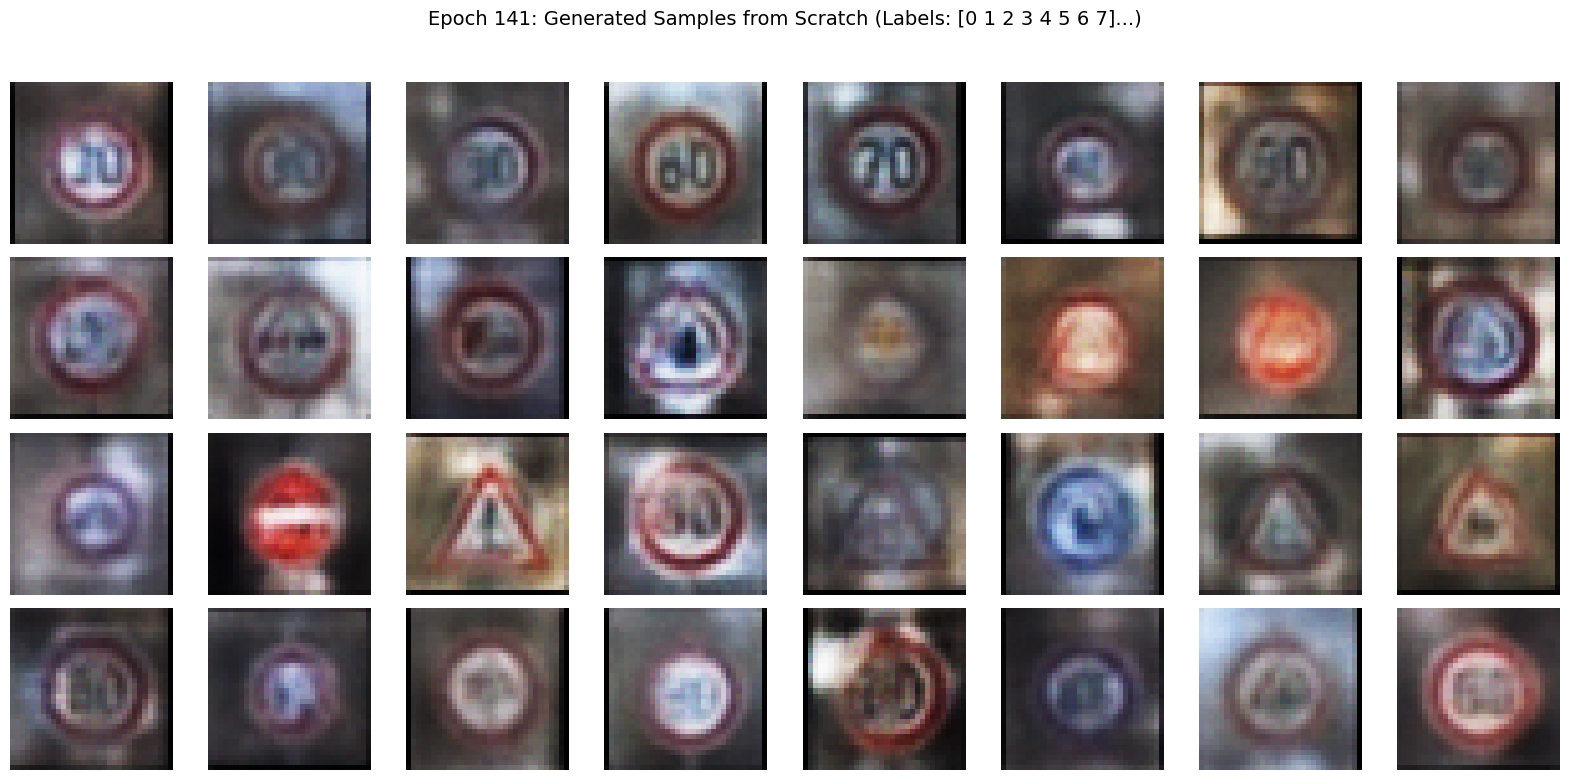

Epoch 142/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 142/200: Total Loss: 420.9948, Recon Loss: 345.4503, KLD Loss: 75.5445


Epoch 143/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 143/200: Total Loss: 420.3581, Recon Loss: 344.8238, KLD Loss: 75.5343


Epoch 144/200: 100%|██████████| 62/62 [00:22<00:00,  2.70it/s]


Epoch 144/200: Total Loss: 420.0966, Recon Loss: 344.5720, KLD Loss: 75.5246


Epoch 145/200: 100%|██████████| 62/62 [00:25<00:00,  2.39it/s]


Epoch 145/200: Total Loss: 419.8539, Recon Loss: 344.2770, KLD Loss: 75.5770


Epoch 146/200: 100%|██████████| 62/62 [00:27<00:00,  2.29it/s]


Epoch 146/200: Total Loss: 420.6304, Recon Loss: 345.0583, KLD Loss: 75.5721


Epoch 147/200: 100%|██████████| 62/62 [00:23<00:00,  2.62it/s]


Epoch 147/200: Total Loss: 419.7344, Recon Loss: 344.2065, KLD Loss: 75.5279


Epoch 148/200: 100%|██████████| 62/62 [00:26<00:00,  2.31it/s]


Epoch 148/200: Total Loss: 420.1653, Recon Loss: 344.6472, KLD Loss: 75.5182


Epoch 149/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 149/200: Total Loss: 419.8745, Recon Loss: 344.3462, KLD Loss: 75.5283


Epoch 150/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 150/200: Total Loss: 419.9789, Recon Loss: 344.4247, KLD Loss: 75.5542


Epoch 151/200: 100%|██████████| 62/62 [00:22<00:00,  2.70it/s]


Epoch 151/200: Total Loss: 419.4304, Recon Loss: 343.8196, KLD Loss: 75.6108


Epoch 152/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 152/200: Total Loss: 419.7128, Recon Loss: 344.2120, KLD Loss: 75.5008


Epoch 153/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 153/200: Total Loss: 419.5074, Recon Loss: 343.9424, KLD Loss: 75.5650


Epoch 154/200: 100%|██████████| 62/62 [00:23<00:00,  2.67it/s]


Epoch 154/200: Total Loss: 419.1319, Recon Loss: 343.6057, KLD Loss: 75.5262


Epoch 155/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 155/200: Total Loss: 419.2952, Recon Loss: 343.8081, KLD Loss: 75.4871


Epoch 156/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 156/200: Total Loss: 419.8662, Recon Loss: 344.3306, KLD Loss: 75.5356


Epoch 157/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 157/200: Total Loss: 419.1700, Recon Loss: 343.6373, KLD Loss: 75.5326


Epoch 158/200: 100%|██████████| 62/62 [00:23<00:00,  2.68it/s]


Epoch 158/200: Total Loss: 418.9579, Recon Loss: 343.3348, KLD Loss: 75.6231


Epoch 159/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 159/200: Total Loss: 418.9138, Recon Loss: 343.4140, KLD Loss: 75.4998


Epoch 160/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 160/200: Total Loss: 419.9029, Recon Loss: 344.4276, KLD Loss: 75.4753


Epoch 161/200: 100%|██████████| 62/62 [00:23<00:00,  2.69it/s]


Epoch 161/200: Total Loss: 418.7310, Recon Loss: 343.1975, KLD Loss: 75.5334


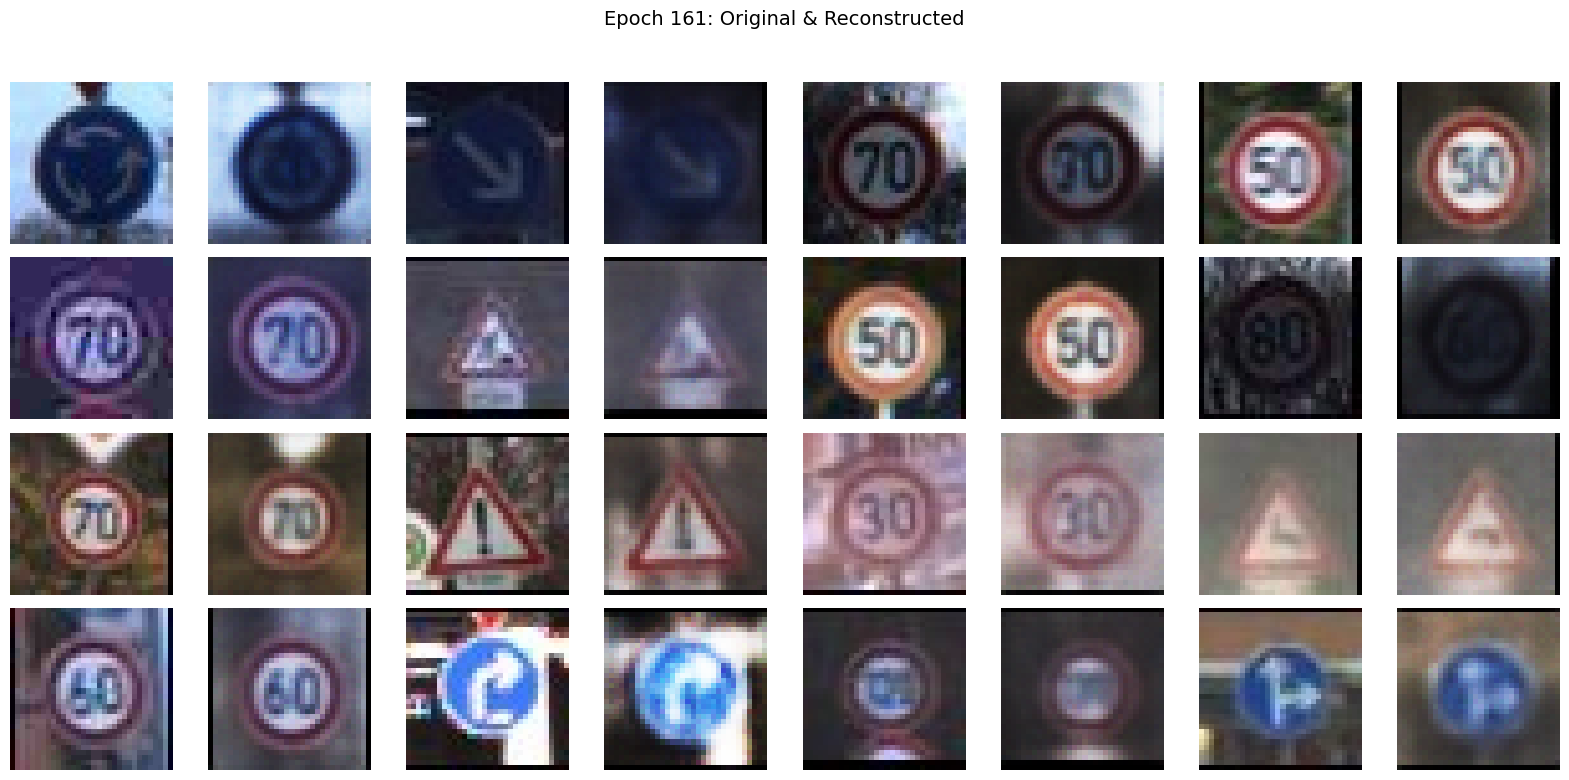

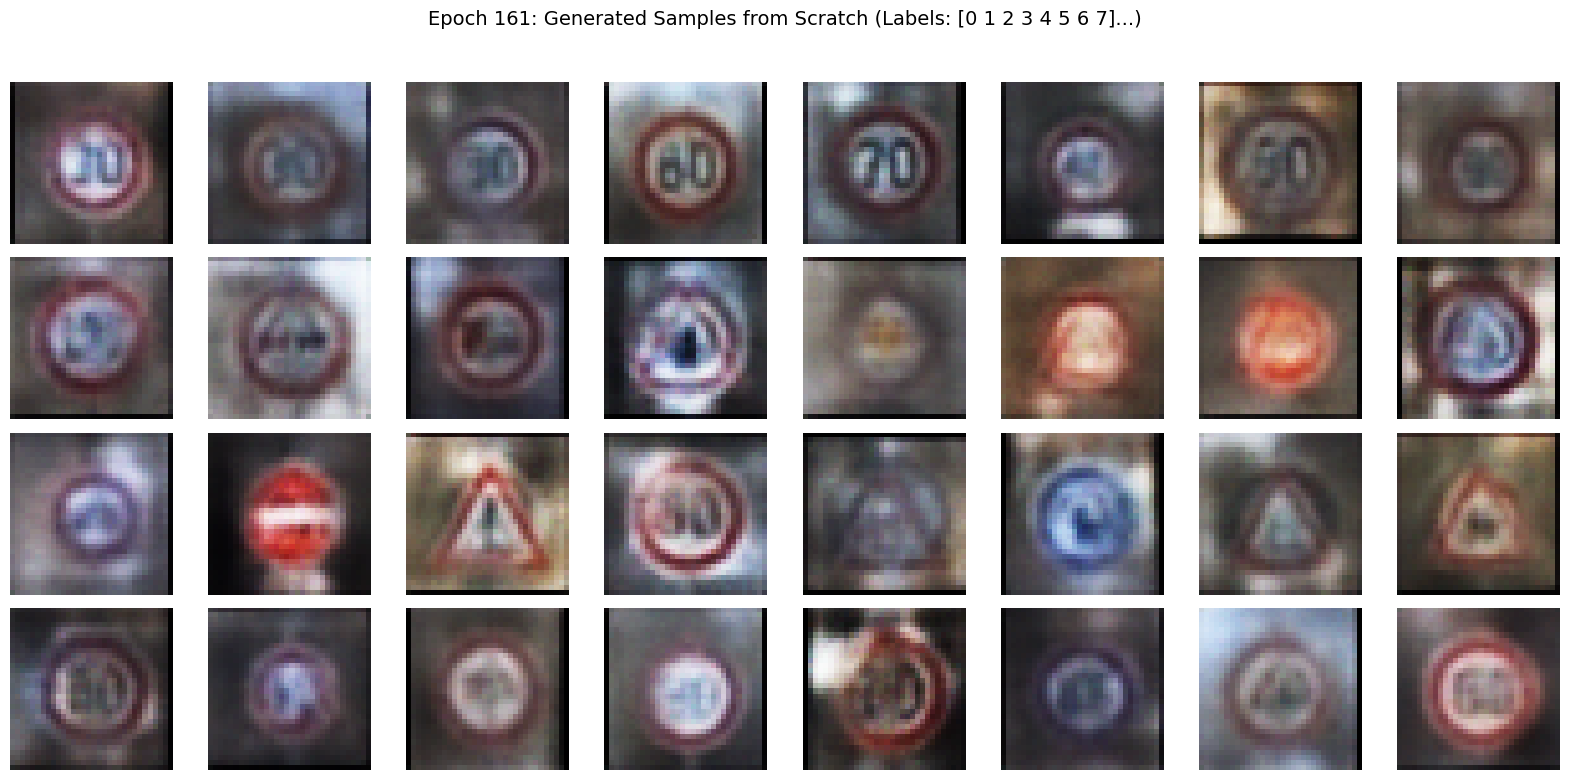

Epoch 162/200: 100%|██████████| 62/62 [00:25<00:00,  2.39it/s]


Epoch 162/200: Total Loss: 418.6585, Recon Loss: 343.1059, KLD Loss: 75.5526


Epoch 163/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 163/200: Total Loss: 419.3061, Recon Loss: 343.7517, KLD Loss: 75.5544


Epoch 164/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 164/200: Total Loss: 418.6172, Recon Loss: 343.0714, KLD Loss: 75.5458


Epoch 165/200: 100%|██████████| 62/62 [00:23<00:00,  2.68it/s]


Epoch 165/200: Total Loss: 418.7840, Recon Loss: 343.2606, KLD Loss: 75.5234


Epoch 166/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 166/200: Total Loss: 418.6684, Recon Loss: 343.0836, KLD Loss: 75.5848


Epoch 167/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 167/200: Total Loss: 418.9567, Recon Loss: 343.3909, KLD Loss: 75.5658


Epoch 168/200: 100%|██████████| 62/62 [00:23<00:00,  2.69it/s]


Epoch 168/200: Total Loss: 418.5360, Recon Loss: 342.9628, KLD Loss: 75.5731


Epoch 169/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 169/200: Total Loss: 418.0341, Recon Loss: 342.4804, KLD Loss: 75.5537


Epoch 170/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 170/200: Total Loss: 418.6449, Recon Loss: 342.9950, KLD Loss: 75.6500


Epoch 171/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 171/200: Total Loss: 418.5700, Recon Loss: 343.0119, KLD Loss: 75.5581


Epoch 172/200: 100%|██████████| 62/62 [00:22<00:00,  2.71it/s]


Epoch 172/200: Total Loss: 418.5491, Recon Loss: 343.0744, KLD Loss: 75.4748


Epoch 173/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 173/200: Total Loss: 418.8410, Recon Loss: 343.2412, KLD Loss: 75.5998


Epoch 174/200: 100%|██████████| 62/62 [00:25<00:00,  2.39it/s]


Epoch 174/200: Total Loss: 418.3116, Recon Loss: 342.7611, KLD Loss: 75.5504


Epoch 175/200: 100%|██████████| 62/62 [00:22<00:00,  2.74it/s]


Epoch 175/200: Total Loss: 418.5868, Recon Loss: 343.0151, KLD Loss: 75.5717


Epoch 176/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 176/200: Total Loss: 418.0793, Recon Loss: 342.5026, KLD Loss: 75.5767


Epoch 177/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 177/200: Total Loss: 417.3795, Recon Loss: 341.7978, KLD Loss: 75.5818


Epoch 178/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 178/200: Total Loss: 418.4047, Recon Loss: 342.7895, KLD Loss: 75.6152


Epoch 179/200: 100%|██████████| 62/62 [00:23<00:00,  2.69it/s]


Epoch 179/200: Total Loss: 418.0770, Recon Loss: 342.5107, KLD Loss: 75.5663


Epoch 180/200: 100%|██████████| 62/62 [00:25<00:00,  2.41it/s]


Epoch 180/200: Total Loss: 418.0507, Recon Loss: 342.4811, KLD Loss: 75.5697


Epoch 181/200: 100%|██████████| 62/62 [00:26<00:00,  2.34it/s]


Epoch 181/200: Total Loss: 418.1439, Recon Loss: 342.6322, KLD Loss: 75.5117


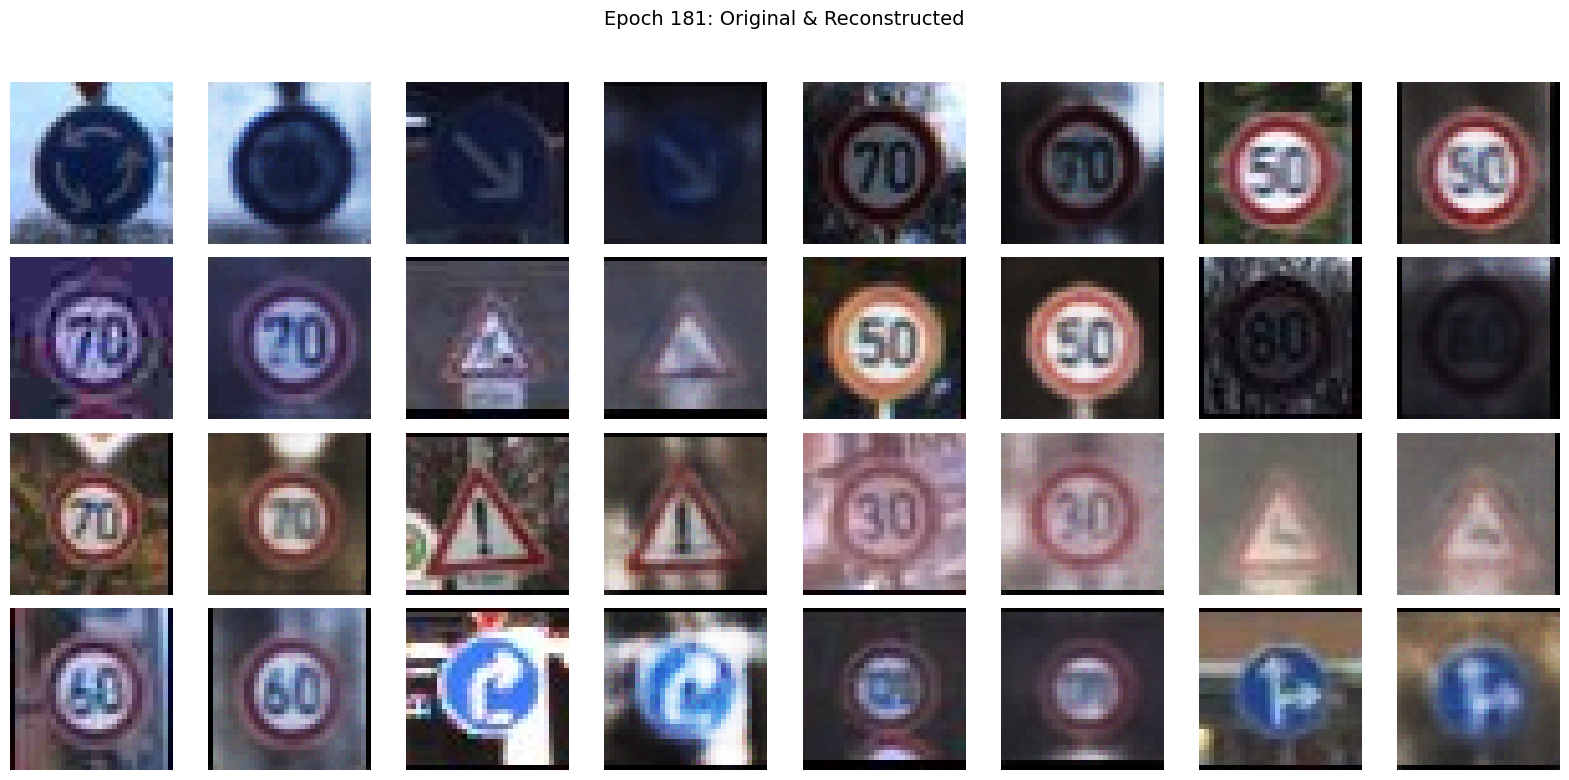

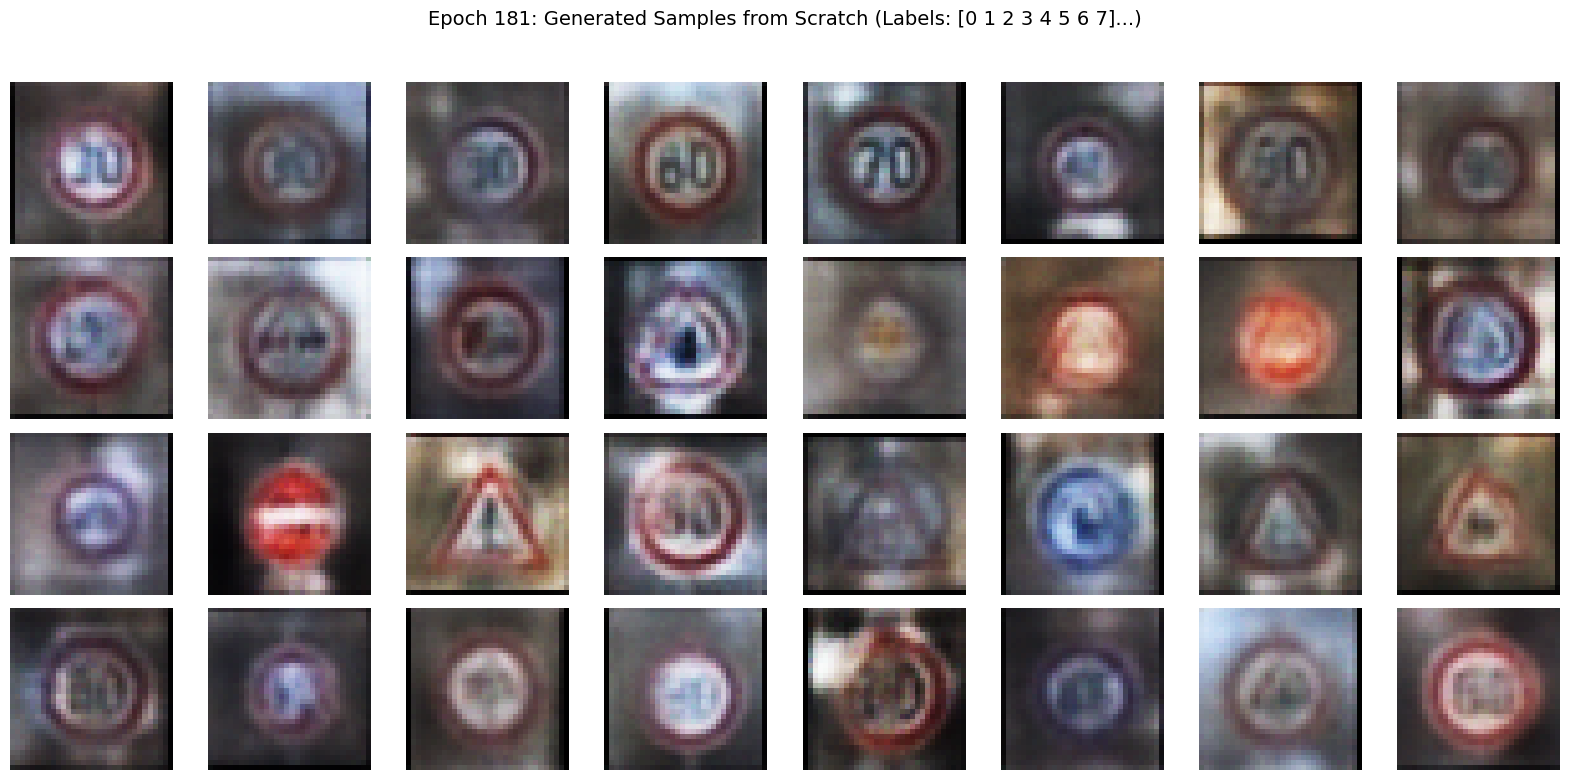

Epoch 182/200: 100%|██████████| 62/62 [00:23<00:00,  2.69it/s]


Epoch 182/200: Total Loss: 418.2978, Recon Loss: 342.7762, KLD Loss: 75.5216


Epoch 183/200: 100%|██████████| 62/62 [00:25<00:00,  2.45it/s]


Epoch 183/200: Total Loss: 417.9484, Recon Loss: 342.3735, KLD Loss: 75.5749


Epoch 184/200: 100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch 184/200: Total Loss: 418.2356, Recon Loss: 342.6432, KLD Loss: 75.5924


Epoch 185/200: 100%|██████████| 62/62 [00:24<00:00,  2.48it/s]


Epoch 185/200: Total Loss: 418.4035, Recon Loss: 342.8540, KLD Loss: 75.5495


Epoch 186/200: 100%|██████████| 62/62 [00:22<00:00,  2.74it/s]


Epoch 186/200: Total Loss: 418.1448, Recon Loss: 342.5886, KLD Loss: 75.5561


Epoch 187/200: 100%|██████████| 62/62 [00:27<00:00,  2.29it/s]


Epoch 187/200: Total Loss: 418.2673, Recon Loss: 342.7028, KLD Loss: 75.5645


Epoch 188/200: 100%|██████████| 62/62 [00:25<00:00,  2.44it/s]


Epoch 188/200: Total Loss: 417.5952, Recon Loss: 341.9954, KLD Loss: 75.5999


Epoch 189/200: 100%|██████████| 62/62 [00:22<00:00,  2.72it/s]


Epoch 189/200: Total Loss: 417.5701, Recon Loss: 341.9955, KLD Loss: 75.5746


Epoch 190/200: 100%|██████████| 62/62 [00:26<00:00,  2.33it/s]


Epoch 190/200: Total Loss: 417.6714, Recon Loss: 342.0382, KLD Loss: 75.6333


Epoch 191/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 191/200: Total Loss: 417.3488, Recon Loss: 341.7595, KLD Loss: 75.5893


Epoch 192/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 192/200: Total Loss: 417.6534, Recon Loss: 342.0492, KLD Loss: 75.6042


Epoch 193/200: 100%|██████████| 62/62 [00:22<00:00,  2.72it/s]


Epoch 193/200: Total Loss: 417.4644, Recon Loss: 341.8645, KLD Loss: 75.5999


Epoch 194/200: 100%|██████████| 62/62 [00:26<00:00,  2.36it/s]


Epoch 194/200: Total Loss: 417.8231, Recon Loss: 342.2617, KLD Loss: 75.5613


Epoch 195/200: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]


Epoch 195/200: Total Loss: 417.4372, Recon Loss: 341.9198, KLD Loss: 75.5174


Epoch 196/200: 100%|██████████| 62/62 [00:22<00:00,  2.72it/s]


Epoch 196/200: Total Loss: 417.7210, Recon Loss: 342.2165, KLD Loss: 75.5045


Epoch 197/200: 100%|██████████| 62/62 [00:26<00:00,  2.35it/s]


Epoch 197/200: Total Loss: 417.5426, Recon Loss: 342.0663, KLD Loss: 75.4762


Epoch 198/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 198/200: Total Loss: 417.4146, Recon Loss: 341.8727, KLD Loss: 75.5419


Epoch 199/200: 100%|██████████| 62/62 [00:26<00:00,  2.37it/s]


Epoch 199/200: Total Loss: 417.5672, Recon Loss: 341.9334, KLD Loss: 75.6338


Epoch 200/200: 100%|██████████| 62/62 [00:23<00:00,  2.69it/s]


Epoch 200/200: Total Loss: 417.2665, Recon Loss: 341.7484, KLD Loss: 75.5181


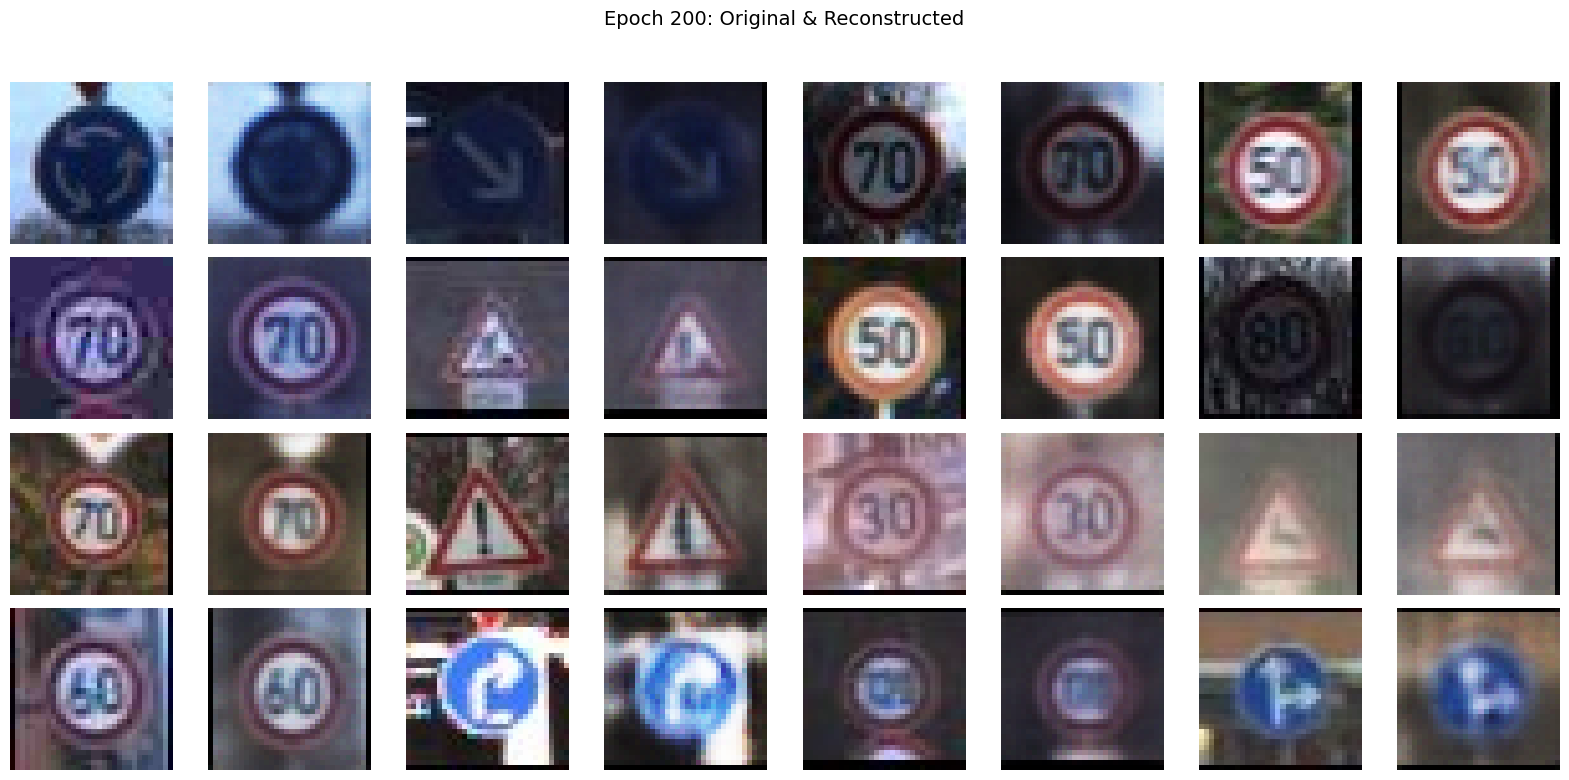

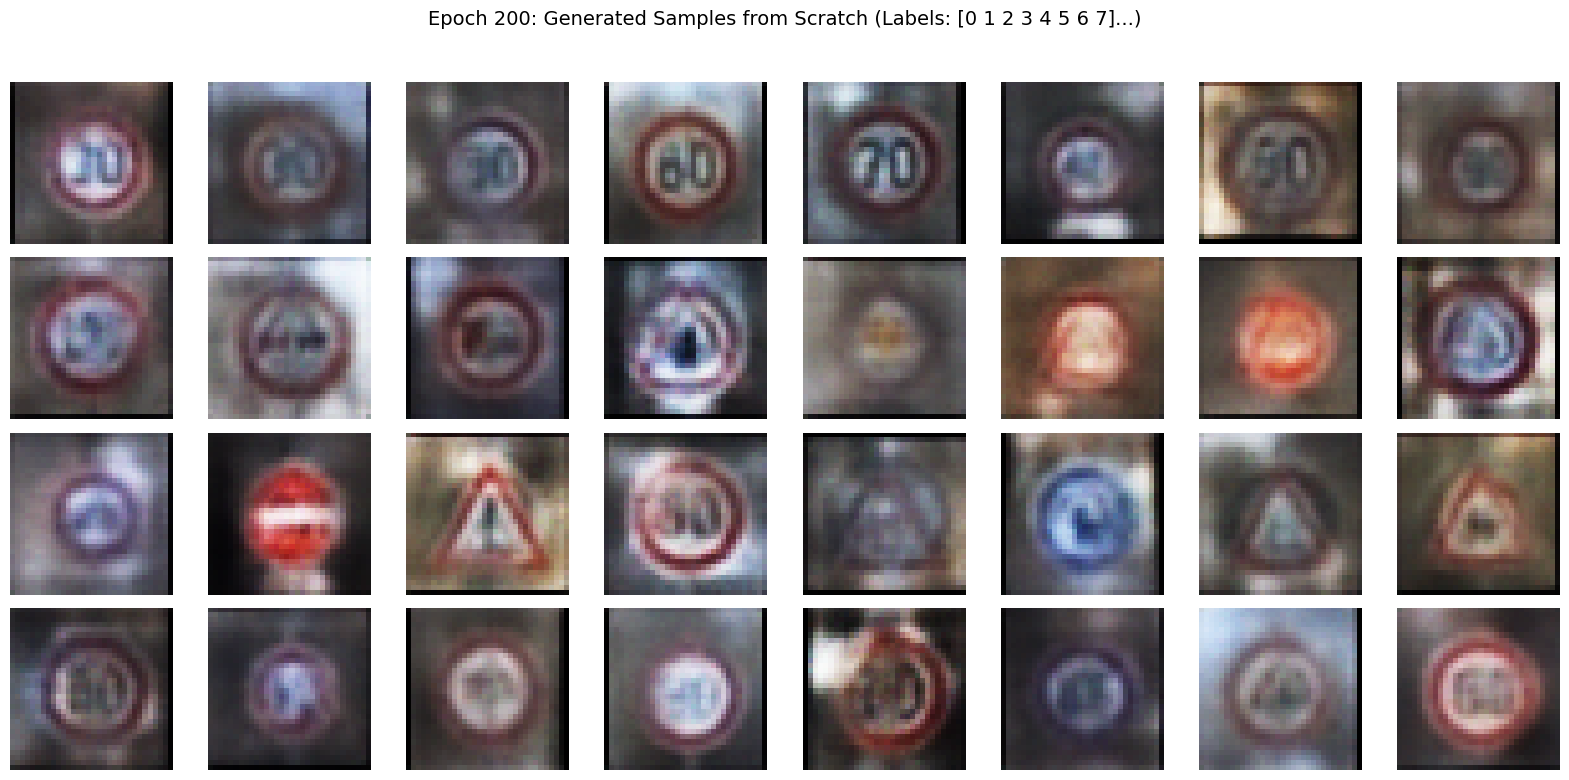

{'total_losses': [1237.1598264632687,
  868.5885728405368,
  785.7926281344506,
  720.5592444635207,
  676.0580444335938,
  642.3954940303679,
  617.7057199785786,
  597.1158417732485,
  581.2285973333543,
  567.7498552876134,
  556.8047426285282,
  548.5813086725051,
  539.4361237556703,
  532.874494983304,
  526.1508218088458,
  519.7517547607422,
  515.732424828314,
  510.0150722380607,
  507.4207414196384,
  503.0447043142011,
  499.2487517326109,
  495.3133293890184,
  492.7999557987336,
  489.24947283344886,
  487.01836567540323,
  484.04173377252397,
  481.40192290275326,
  479.6164358815839,
  479.18386791598414,
  475.2260279501638,
  473.5524321525328,
  472.3820155974357,
  470.2206071422946,
  467.76686539188506,
  466.9170167984501,
  465.0274431782384,
  464.0990428309287,
  461.77083809145034,
  461.17818573982487,
  459.61180705408896,
  457.76129987162926,
  456.9739291283392,
  456.27813573037423,
  455.237298780872,
  454.18646289456274,
  452.34660240911666,
  452.2

In [27]:
cvae_trainer.fit(train_dl, num_epochs=200)

## Save model

In [28]:
import os
import torch

weights_dir = "./gnn/weights"

os.makedirs(weights_dir, exist_ok=True)

cvae_model_path = os.path.join(weights_dir, "cvae_model_big.pth")

torch.save(cvae_model.state_dict(), cvae_model_path)

print(f"cVAE model weights saved to: {cvae_model_path}")

cVAE model weights saved to: ./gnn/weights/cvae_model_big.pth


# Evaluation

## Load Dataset

In [29]:
test_dir = "./data/test"
test_ds = ImageFolder(test_dir)
len(test_ds), len(test_ds.classes)

(7842, 43)

In [31]:
import os
import time
from torchvision.utils import save_image
from collections import Counter


results_id = time.time()
results_dir = f"./cvae_results/{results_id}"
os.makedirs(results_dir, exist_ok=True)

mean_t = torch.tensor(train_mean).view(1, IMG_CHANNELS, 1, 1).to(device)
std_t = torch.tensor(train_std).view(1, IMG_CHANNELS, 1, 1).to(device)
class_counts = Counter(test_ds.targets)

cvae_model.eval()



for cls, cnt in class_counts.items():
    for i in range(cnt):
        z = torch.randn(1, latent_dim, device=device)
        label_tensor = torch.tensor([cls], dtype=torch.long, device=device)

        with torch.no_grad():
            img = cvae_model.generate(z, label_tensor)

        img = img * std_t + mean_t

        fname = os.path.join(results_dir, f"class_{cls}_sample_{i}.jpg")
        save_image(img.clamp(0, 1), fname)
print(f"Saved generated images to {fname}")

Saved generated images to ./cvae_results/1747112479.0259833/class_42_sample_47.jpg


Calculate the FID between test set and generated images

In [32]:
from pytorch_fid.fid_score import calculate_fid_given_paths

test_flat_dir = "./data/test_flat"
generated_dir = results_dir

fid = calculate_fid_given_paths([test_flat_dir, generated_dir], batch_size, device, dims=2048, num_workers=1)

print(f"FID: {fid}")

100%|██████████| 16/16 [03:58<00:00, 14.93s/it]


FID: 118.22617390623796


In [ ]:
# clean up


# import shutil
# import os

# results_dir = f"./cvae_results/{results_id}"

# # Check if the directory exists before trying to remove it
# if os.path.exists(results_dir):
#     shutil.rmtree(results_dir)
#     print(f"Directory {results_dir}_{results_id} have been removed.")
# else:
#     print(f"The directory {results_dir}_{results_id} does not exist.")

Directory ./cvae_results/1747092739.8218522_1747092739.8218522 have been removed.
